# 1. Biblioteki

In [1]:
library(dplyr)
library(Metrics)
library(FactoMineR)
library(factoextra)
library(tidyverse)
library(mlbench)
library(caret)
library(MASS)
library(randomForest)

library("FactoMineR")
library("factoextra")



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'FactoMineR' was built under R version 4.0.5"
Warning message:
"package 'factoextra' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.0     v purrr   0.3.4
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'fo

# 2. Wczytuje dane

In [2]:
# Train to zbiór do uczenia
train_df=read.csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv", encoding="utf-8")

# Test miał na celu porównanie poprawnośći predykcji na zbiorze, którego nie
# nie "widział" model podczas uczenia
test_df=read.csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv", encoding="utf-8")

# Val, odpowiadał za naprowadzanie modelu podczas walidacji w procesie uczenia
val_df=read.csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv", encoding="utf-8")


colnames(train_df)<-c('id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria')
colnames(test_df)<-c('id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria')
colnames(val_df)<-c('id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria')


In [3]:
head(train_df)

,id,Województwo,Data urodzenia,IE,Dokł. IE,PF,PI-PROD,PI-POKR,Prc,Psm,...,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og,kategoria
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1842,WIELKOPOLSKIE,2020,2120,66,142,137,127,121,113,...,577,2,452,1,115,114,109,127,123,krowa
2,1464,KUJAWSKO-POMORSKIE,2018,1912,70,137,126,123,109,113,...,358,-16,354,-4,115,113,104,123,123,jalowka
3,813,POMORSKIE,2020,2126,66,136,126,120,110,107,...,368,-4,350,4,104,103,102,122,117,krowa
4,961,KUJAWSKO-POMORSKIE,2020,2089,68,136,133,111,104,110,...,546,12,410,7,106,106,101,112,112,krowa
5,6,ZACHODNIOPOMORSKIE,2020,2853,66,143,125,115,91,95,...,501,36,289,15,102,102,118,123,109,jalowka
6,974,PODLASKIE,2020,2088,66,141,135,115,111,112,...,554,13,433,10,111,107,103,117,118,krowa


## 2.1 Poprawiam nazwy zmiennych

In [4]:
colnames(train_df)

[1] "id"             "Województwo"    "Data urodzenia" "IE"            
 [5] "Dokł. IE"       "PF"             "PI-PROD"        "PI-POKR"       
 [9] "Prc"            "Psm"            "Pnr"            "Pw"            
[13] "PI-PLOD"        "CRj"            "CRk"            "PP"            
[17] "OMC"            "WH-KSOM"        "WH-DLUG"        "IP"            
[21] "kg ml"          "kg tł"          "% tł"           "kg bi"         
[25] "% bi"           "rc"             "sm"             "nr"            
[29] "w"              "og"             "kategoria"

In [5]:
str(train_df)

'data.frame':	1504 obs. of  31 variables:
 $ id            : int  1842 1464 813 961 6 974 647 1096 631 335 ...
 $ Województwo   : chr  "WIELKOPOLSKIE" "KUJAWSKO-POMORSKIE" "POMORSKIE" "KUJAWSKO-POMORSKIE" ...
 $ Data urodzenia: int  2020 2018 2020 2020 2020 2020 2020 2019 2020 2020 ...
 $ IE            : int  2120 1912 2126 2089 2853 2088 2173 2139 2178 2303 ...
 $ Dokł. IE      : int  66 70 66 68 66 66 66 68 66 65 ...
 $ PF            : int  142 137 136 136 143 141 140 138 136 149 ...
 $ PI-PROD       : int  137 126 126 133 125 135 138 122 129 145 ...
 $ PI-POKR       : int  127 123 120 111 115 115 121 120 118 127 ...
 $ Prc           : int  121 109 110 104 91 111 109 116 102 121 ...
 $ Psm           : int  113 113 107 110 95 112 105 110 112 124 ...
 $ Pnr           : int  106 103 102 99 101 99 108 113 96 110 ...
 $ Pw            : int  128 128 124 114 124 118 123 116 125 124 ...
 $ PI-PLOD       : int  109 114 113 114 134 122 99 128 110 106 ...
 $ CRj           : int  107 114 112 113

### 2.2 Usuwam niepotrzebne do IE kolumny i zakodowuje Date urodzenia jako zmienną kategoryczna

In [6]:
train_df$id<-NULL
test_df$id<-NULL
val_df$id<-NULL

train_df$kategoria<-NULL
test_df$kategoria<-NULL
val_df$kategoria<-NULL


train_df$'PF'<-NULL
test_df$'PF'<-NULL
val_df$'PF'<-NULL

train_df$'IE'<-NULL
test_df$'IE'<-NULL
val_df$'IE'<-NULL

train_df$'Dokł. IE'<-NULL
test_df$'Dokł. IE'<-NULL
val_df$'Dokł. IE'<-NULL


train_df$'Data urodzenia'<-as.character(train_df$'Data urodzenia')
test_df$'Data urodzenia'<-as.character(test_df$'Data urodzenia')
val_df$'Data urodzenia'<-as.character(val_df$'Data urodzenia')

In [7]:
str(train_df)

'data.frame':	1504 obs. of  26 variables:
 $ Województwo   : chr  "WIELKOPOLSKIE" "KUJAWSKO-POMORSKIE" "POMORSKIE" "KUJAWSKO-POMORSKIE" ...
 $ Data urodzenia: chr  "2020" "2018" "2020" "2020" ...
 $ PI-PROD       : int  137 126 126 133 125 135 138 122 129 145 ...
 $ PI-POKR       : int  127 123 120 111 115 115 121 120 118 127 ...
 $ Prc           : int  121 109 110 104 91 111 109 116 102 121 ...
 $ Psm           : int  113 113 107 110 95 112 105 110 112 124 ...
 $ Pnr           : int  106 103 102 99 101 99 108 113 96 110 ...
 $ Pw            : int  128 128 124 114 124 118 123 116 125 124 ...
 $ PI-PLOD       : int  109 114 113 114 134 122 99 128 110 106 ...
 $ CRj           : int  107 114 112 113 129 124 98 120 107 106 ...
 $ CRk           : int  110 113 117 126 133 119 107 135 113 113 ...
 $ PP            : int  101 94 94 89 102 80 107 110 105 97 ...
 $ OMC           : int  105 98 100 100 113 93 107 121 107 101 ...
 $ WH-KSOM       : int  112 118 126 116 139 121 116 127 119 118 ...
 $

In [8]:
cale_train=rbind(train_df,test_df,val_df)
dim(cale_train)

[1] 1881   26

In [9]:
table(cale_train$'Data urodzenia')


2015 2016 2017 2018 2019 2020 2021 
   1   23   68  279  397 1066   47 

#### Usuwam wpis z rokiem 2015 bo jest tylko 1

In [10]:
cale_train= cale_train[cale_train$'Data urodzenia'!='2015',]
table(cale_train$'Data urodzenia')


2016 2017 2018 2019 2020 2021 
  23   68  279  397 1066   47 

In [11]:
table(cale_train$'Województwo')


      DOLNOĹšLÄ„SKIE   KUJAWSKO-POMORSKIE            Ĺ\201Ă“DZKIE 
                  32                  298                   41 
           ĹšLÄ„SKIE     ĹšWIÄ\230TOKRZYSKIE            LUBELSKIE 
                  17                   13                    4 
            LUBUSKIE         MAĹ\201OPOLSKIE          MAZOWIECKIE 
                  47                   12                  106 
            OPOLSKIE         PODKARPACKIE            PODLASKIE 
                 227                    1                  175 
           POMORSKIE WARMIĹ\203SKO-MAZURSKIE        WIELKOPOLSKIE 
                  94                   23                  578 
  ZACHODNIOPOMORSKIE 
                 212 

#### Usuwam Podkarpackie i Lubleskie n<10

In [12]:
cale_train= cale_train[cale_train$'Województwo'!='PODKARPACKIE',]
cale_train= cale_train[cale_train$'Województwo'!='LUBELSKIE',]
table(cale_train$'Województwo')


      DOLNOĹšLÄ„SKIE   KUJAWSKO-POMORSKIE            Ĺ\201Ă“DZKIE 
                  32                  298                   41 
           ĹšLÄ„SKIE     ĹšWIÄ\230TOKRZYSKIE             LUBUSKIE 
                  17                   13                   47 
        MAĹ\201OPOLSKIE          MAZOWIECKIE             OPOLSKIE 
                  12                  106                  227 
           PODLASKIE            POMORSKIE WARMIĹ\203SKO-MAZURSKIE 
                 175                   94                   23 
       WIELKOPOLSKIE   ZACHODNIOPOMORSKIE 
                 578                  212 

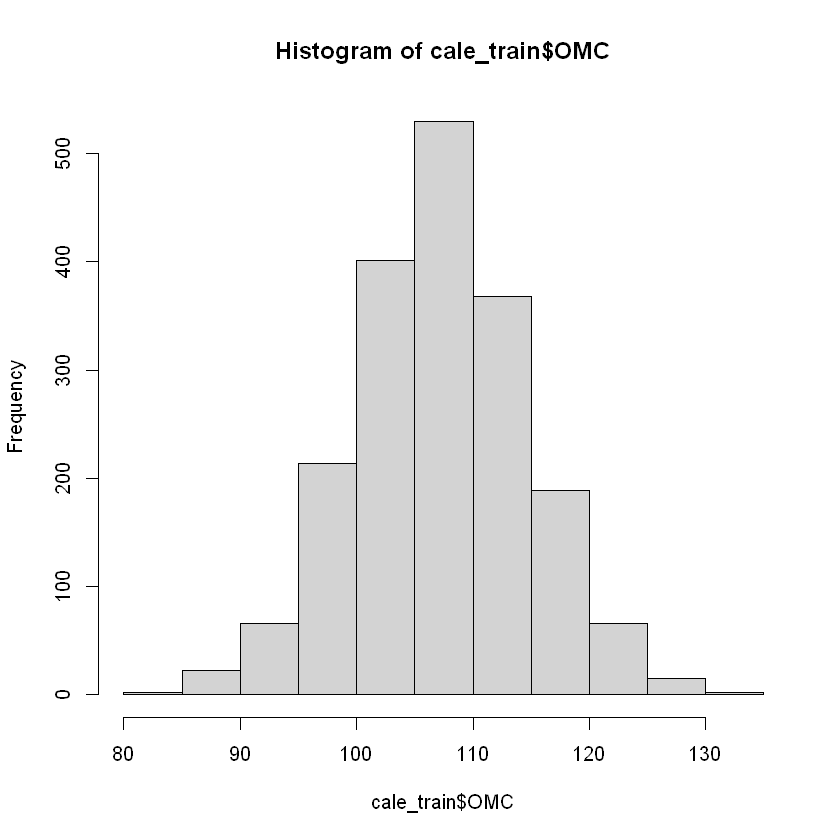

In [13]:
hist(cale_train$OMC)

# 3. Korelacje zmiennej IE z pozostałymi zmiennymi

In [14]:
korelacje=as.data.frame(cor(cale_train[,3:length(colnames(cale_train))],method="pearson",y = cale_train$OMC))
korelacje$nazwy=rownames(korelacje)
row.names(korelacje) <- NULL
korelacje <- korelacje[order(-korelacje$V1),]

In [15]:
korelacje

,V1,nazwy
,<dbl>,<chr>
11,1.00000000,OMC
10,0.86263035,PP
9,0.64171150,CRk
7,0.61314984,PI-PLOD
13,0.48968095,WH-DLUG
8,0.42106940,CRj
22,0.28045811,nr
6,0.17370161,Pw
23,0.16528660,w


In [16]:
korelacje$V1[2:24]

[1]  0.86263035  0.64171150  0.61314984  0.48968095  0.42106940  0.28045811
 [7]  0.17370161  0.16528660  0.16299974  0.12876124  0.12198709  0.11029342
[13]  0.07344810 -0.08091711 -0.08467185 -0.14598596 -0.21843254 -0.35055446
[19] -0.41340074 -0.54432984 -0.57037509 -0.57147564 -0.57742184

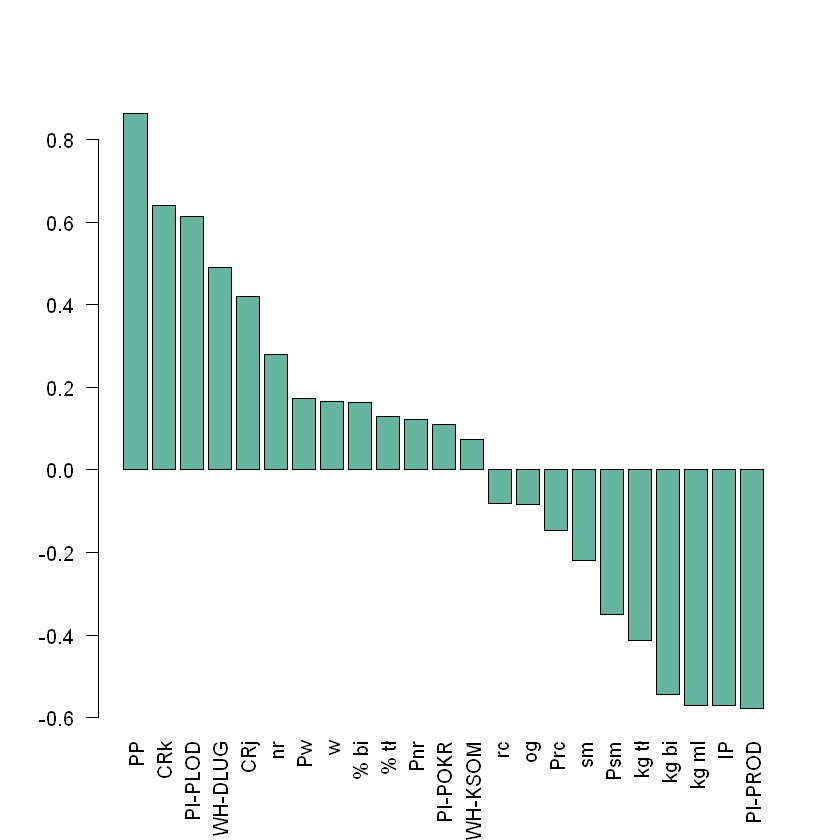

In [17]:
barplot(height=korelacje$V1[2:24],
        col="#69b3a2",
        names.arg=korelacje$nazwy[2:24], 
        ylim=c(round(min(korelacje$V1[2:24]),1),
               round(max(korelacje$V1[2:24]),1)),
        las=2,
       )

In [18]:
#write.csv(cale_train,"D:/STUDIA/ROK_II/Projekt/IE_DANE_DO_KORELACJI.csv", row.names = FALSE)

# 4. Modyfikacje danych

## 4.1 Artefakty


PI-PLOD 0.618658 	 oraz 	 CRj 0.42768 -> 	 PI-PLOD | CRj 0.966203

WH-DLUG 0.50026 	 oraz 	 IP -0.571245 -> 	 WH-DLUG | IP 0.573841

nr 0.284966 	 oraz 	 kg bi -0.550313 -> 	 nr | kg bi 0.521457

Pw 0.179868 	 oraz 	 og -0.074892 -> 	 Pw | og 0.341349

w 0.169424 	 oraz 	 kg ml -0.571576 -> 	 w | kg ml 0.325541

PI-POKR 0.116957 	 oraz 	 sm -0.219586 -> 	 PI-POKR | sm 0.29085

Pnr 0.121538 	 oraz 	 kg tł -0.406225 -> 	 Pnr | kg tł 0.288239


In [19]:
# Feature Extraction
cale_artefakty<-cale_train
cale_artefakty$PI_PLOD__CRj<-cale_artefakty$'PI-PLOD'/cale_artefakty$CRj
cale_artefakty$WH_DLUG__IP<-cale_artefakty$'WH-DLUG'/cale_artefakty$IP
cale_artefakty$nr__kg_bi<-cale_artefakty$nr/cale_artefakty$'kg bi'
cale_artefakty$Pw__og<-cale_artefakty$Pw/cale_artefakty$og
cale_artefakty$w__kg_ml<-cale_artefakty$w/cale_artefakty$'kg ml'
cale_artefakty$PI_POKR__sm<-cale_artefakty$'PI-POKR'/cale_artefakty$sm
cale_artefakty$Pnr__kg_tl<-cale_artefakty$Pnr/cale_artefakty$'kg tł'


# Usuwam wykorzystane zmienne 
cale_artefakty$'PI-PLOD'<- NULL
cale_artefakty$CRj <-NULL

cale_artefakty$'WH-DLUG'<- NULL
cale_artefakty$IP <-NULL

cale_artefakty$nr<- NULL
cale_artefakty$'kg bi' <-NULL

cale_artefakty$Pw<- NULL
cale_artefakty$og <-NULL

cale_artefakty$w<- NULL
cale_artefakty$'kg ml' <-NULL

cale_artefakty$'PI-POKR'<- NULL
cale_artefakty$sm <-NULL

cale_artefakty$Pnr<- NULL
cale_artefakty$'kg tł' <-NULL


In [20]:
str(cale_artefakty)

'data.frame':	1875 obs. of  19 variables:
 $ Województwo   : chr  "WIELKOPOLSKIE" "KUJAWSKO-POMORSKIE" "POMORSKIE" "KUJAWSKO-POMORSKIE" ...
 $ Data urodzenia: chr  "2020" "2018" "2020" "2020" ...
 $ PI-PROD       : int  137 126 126 133 125 135 138 122 129 145 ...
 $ Prc           : int  121 109 110 104 91 111 109 116 102 121 ...
 $ Psm           : int  113 113 107 110 95 112 105 110 112 124 ...
 $ CRk           : int  110 113 117 126 133 119 107 135 113 113 ...
 $ PP            : int  101 94 94 89 102 80 107 110 105 97 ...
 $ OMC           : int  105 98 100 100 113 93 107 121 107 101 ...
 $ WH-KSOM       : int  112 118 126 116 139 121 116 127 119 118 ...
 $ % tł          : int  2 -16 -4 12 36 13 39 16 24 22 ...
 $ % bi          : int  1 -4 4 7 15 10 19 24 4 21 ...
 $ rc            : num  115 115 104 106 102 111 111 110 106 116 ...
 $ PI_PLOD__CRj  : num  1.02 1 1.01 1.01 1.04 ...
 $ WH_DLUG__IP   : num  0.079 0.1135 0.1133 0.0864 0.1205 ...
 $ nr__kg_bi     : num  0.241 0.294 0.291 0.2

In [21]:
sum(with(cale_artefakty, cale_artefakty == -Inf))
sum(with(cale_artefakty, cale_artefakty == Inf))

[1] 0

[1] 0

##  4.2 Dane z korelacją > 0 

Zmienne z korelacja ponizej 0:

-0.08091711	rc

-0.08467185	og

-0.14598596	Prc

-0.21843254	sm

-0.35055446	Psm

-0.41340074	kg tł

-0.54432984	kg bi


-0.57037509	kg ml

-0.57147564	IP

-0.57742184	PI-PROD

In [22]:
cale_kor_pow_0 <- cale_train
cale_kor_pow_0$rc <- NULL
cale_kor_pow_0$og <- NULL
cale_kor_pow_0$Prc <- NULL
cale_kor_pow_0$sm <- NULL
cale_kor_pow_0$Psm <- NULL
cale_kor_pow_0$'kg tł' <- NULL
cale_kor_pow_0$'kg bi' <- NULL
cale_kor_pow_0$'kg ml' <- NULL
cale_kor_pow_0$IP <- NULL
cale_kor_pow_0$'PI-PROD' <- NULL

In [23]:
str(cale_kor_pow_0)

'data.frame':	1875 obs. of  16 variables:
 $ Województwo   : chr  "WIELKOPOLSKIE" "KUJAWSKO-POMORSKIE" "POMORSKIE" "KUJAWSKO-POMORSKIE" ...
 $ Data urodzenia: chr  "2020" "2018" "2020" "2020" ...
 $ PI-POKR       : int  127 123 120 111 115 115 121 120 118 127 ...
 $ Pnr           : int  106 103 102 99 101 99 108 113 96 110 ...
 $ Pw            : int  128 128 124 114 124 118 123 116 125 124 ...
 $ PI-PLOD       : int  109 114 113 114 134 122 99 128 110 106 ...
 $ CRj           : int  107 114 112 113 129 124 98 120 107 106 ...
 $ CRk           : int  110 113 117 126 133 119 107 135 113 113 ...
 $ PP            : int  101 94 94 89 102 80 107 110 105 97 ...
 $ OMC           : int  105 98 100 100 113 93 107 121 107 101 ...
 $ WH-KSOM       : int  112 118 126 116 139 121 116 127 119 118 ...
 $ WH-DLUG       : int  117 121 121 118 130 113 120 123 124 117 ...
 $ % tł          : int  2 -16 -4 12 36 13 39 16 24 22 ...
 $ % bi          : int  1 -4 4 7 15 10 19 24 4 21 ...
 $ nr            : num  

### 4.2.5 PCA

In [24]:
train_do_pca=rbind(train_df, test_df)

In [25]:
dim(train_do_pca)

[1] 1692   26

In [26]:
dim(val_df)

[1] 189  26

In [27]:
train_do_pca$'Województwo'<- NULL
val_df$'Data urodzenia'<- NULL
val_df$'Województwo'<- NULL
train_do_pca$'Data urodzenia'<- NULL


In [28]:
str(train_do_pca)

'data.frame':	1692 obs. of  24 variables:
 $ PI-PROD: int  137 126 126 133 125 135 138 122 129 145 ...
 $ PI-POKR: int  127 123 120 111 115 115 121 120 118 127 ...
 $ Prc    : int  121 109 110 104 91 111 109 116 102 121 ...
 $ Psm    : int  113 113 107 110 95 112 105 110 112 124 ...
 $ Pnr    : int  106 103 102 99 101 99 108 113 96 110 ...
 $ Pw     : int  128 128 124 114 124 118 123 116 125 124 ...
 $ PI-PLOD: int  109 114 113 114 134 122 99 128 110 106 ...
 $ CRj    : int  107 114 112 113 129 124 98 120 107 106 ...
 $ CRk    : int  110 113 117 126 133 119 107 135 113 113 ...
 $ PP     : int  101 94 94 89 102 80 107 110 105 97 ...
 $ OMC    : int  105 98 100 100 113 93 107 121 107 101 ...
 $ WH-KSOM: int  112 118 126 116 139 121 116 127 119 118 ...
 $ WH-DLUG: int  117 121 121 118 130 113 120 123 124 117 ...
 $ IP     : int  1481 1066 1068 1366 1079 1420 1536 910 1236 1780 ...
 $ kg ml  : int  1370 1209 982 1080 516 1069 847 380 918 1153 ...
 $ kg tł  : int  577 358 368 546 501 554 67

In [29]:
train_do_pca[,11]

[1] 105  98 100 100 113  93 107 121 107 101 113 104 111 105 108 108 107 110
  [19] 101 110 110 100 117 111 111 118 108  98 117 103 110 110 115 116  98 102
  [37] 115  96 115 104 104 123 111 116  97 106 100 112 101 105 106 119 109 103
  [55] 108 108 107 102 102 108 105 111 103  99 117 105  93 110  95  95 109 102
  [73] 108 119 103 116  87 113 102 100 101 110 107 104 104 107 100 109 111 107
  [91] 100 118 107 106 120 105 126 101 109 118  99 108 105 101 100 102 111 103
 [109] 108 107 103 106 118 110 104  99 103 114 104 108 109 113 109 112  97 107
 [127] 100 108 116 107 104 123 106 115 112 109 110 117 100 104 112 107 115 117
 [145] 130  95 107 113 103 103 127 104 114  82 102 111 110 111 113 105 107 114
 [163]  97  93  99 121 123 102  98 100 100  92 128 108 120  98 101 103 103 105
 [181] 115 108 102 104 113 106 119  90 117 104 108 107 118 107 120 101  93 116
 [199] 112  98  87 117 106 100 109  96 115 105 115 113 102 126 110 119 104  98
 [217] 114 111 110 118 114 107 112 120 106 102 111 110 115 104 111 110 112 105
 [235] 110 100 102 106 104 104 109 109 125 122 103 120 112 114 107 112 102 106
 [253] 110 109  96  97 109 119 117 112 107 103 117 100  96 109 115 107 100 105
 [271] 101  92 107 104  95 107 106 103 102 108 111 107 100 110 109  87 118 107
 [289] 102  98  99 114 113 110 112 106 105 110 125 121  95 110 111  99  96 103
 [307] 120 106 127 108 104 111 111 106 100 103 104 112 110 115 115 106  97 114
 [325]  93 108 111 118 109 111 116 106 101 103 108  99 111 107 115 108 112  94
 [343] 121 102 109  89 104 112 107 107 121 104 115 104 108 106 106 107 105 118
 [361] 110 100 110 122 110 103 117 106 106 107  99 119 114 107  91 101 111 108
 [379] 111  97 101 103 117 121 112 110 118 115 110 107 109 108  87 113 107 106
 [397] 103 101 103  98 116 106 104 116 112 112  88 110 108 108 103 109 118 110
 [415] 111 118  87  99 110 110 109 107 110 106 120 105 123 103  96  96  93 112
 [433]  92 102 115 124 115 115 111 103 108 111 115 116 122 102 116 109 116 116
 [451] 103 117  90 105  99 110 107 109 107 110 115 113 116  98  92 106 110 105
 [469] 105 101 105 112 105 111  91 100 120 114 117 120 104  99 108 103 103 120
 [487] 121 108 102 106 112 112 107 107  92 108  97 107 103 102 112 110 115 108
 [505] 109  98 113 103 113 112 102 118 108 105  96 118 109 112 107  97 101 107
 [523] 111 106 114 107 111  99 106 108 103 103 108 109 110 108 105 104 106 112
 [541] 114  97 109 110 100  96 103 106 113 115 123 120 114 103 113 110 102 104
 [559] 125 109 108 102 113 108 117 111 110 100 114 118 111 116 112 104 111 111
 [577] 105 104 112 107  92 116 113 106 104 104 109 107 100 108  96 101 108  99
 [595] 115  99 107  99 117 108 104 109 105 114 104 116 109 107 116 106 117  98
 [613]  99 103 108 101 105 107 100 125 117 107 115 110 106 122 102  96  99 119
 [631] 108 116 114 107 110 114 119 105 113 115 106 116 109 118  99 120 100 111
 [649] 107 114 104 113 103 113  98 115 116 115  93 111 114 111 107 100 106 113
 [667] 111 100 109  99 101 106 113 109 113  97 104 111 114 106 101 105 114 107
 [685] 108 118 106 114 100  97 116 102 116 118 104 101 106 100 120  99  91 109
 [703] 109 107 120 104 105 114 103 107 103 102 104  99 108 124 105 107 115 108
 [721] 110 101  99  97  93 100  92  90 111 111 115 104 102  95 115 110  97 110
 [739] 105 107 118 108 106  97 106 104 111 121 108 102  95 113 106 103 105 108
 [757] 122 107  97  99 100 110 107  98 122 116 114 109 111 121  92 111 108 102
 [775] 105 115 102 100  94 104 121 103 104 107 111 107 102 108 102 109 107 110
 [793] 107  95 103 119 106 100 120 114 114 108  96 105  96 100  91 105  98 102
 [811] 113 112 118 102  94 109 108 105 102 114 112 110 110 110 109 101 114 109
 [829] 115 111 118 113 103 105 110  96 100 113 100 110 119  99 115 118 101 104
 [847] 102 118 116 120 108 100 119 110 110 100 105 107 103 109 108 105 113 108
 [865] 102 121 110  99 110 106 119 106 123 108 122  91 117 119 109  97 116 118
 [883] 101 110 109 102 110 116 100 100 109 112 103 112 101 100  90 112  97  98
 [901] 103 104 106 111 101 113 105 107 114 114 110 10

In [30]:
train_do_pca

PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
137,127,121,113,106,128,109,107,110,101,...,1370,577,2,452,1,115,114,109,127,123
126,123,109,113,103,128,114,114,113,94,...,1209,358,-16,354,-4,115,113,104,123,123
126,120,110,107,102,124,113,112,117,94,...,982,368,-4,350,4,104,103,102,122,117
133,111,104,110,99,114,114,113,126,89,...,1080,546,12,410,7,106,106,101,112,112
125,115,91,95,101,124,134,129,133,102,...,516,501,36,289,15,102,102,118,123,109
135,115,111,112,99,118,122,124,119,80,...,1069,554,13,433,10,111,107,103,117,118
138,121,109,105,108,123,99,98,107,107,...,847,672,39,432,19,111,107,114,121,116
122,120,116,110,113,116,128,120,135,110,...,380,284,16,313,24,110,107,119,114,115
129,118,102,112,96,125,110,107,113,105,...,918,578,24,329,4,106,103,112,125,119


In [31]:
omc.pca <- prcomp(train_do_pca, center = TRUE,scale. = TRUE)

summary(omc.pca)


Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.565 2.2815 1.6211 1.52851 1.33197 1.19649 0.97782
Proportion of Variance 0.274 0.2169 0.1095 0.09735 0.07392 0.05965 0.03984
Cumulative Proportion  0.274 0.4909 0.6004 0.69777 0.77170 0.83135 0.87118
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.88550 0.76471 0.69696 0.59889 0.55303 0.43896 0.39653
Proportion of Variance 0.03267 0.02437 0.02024 0.01494 0.01274 0.00803 0.00655
Cumulative Proportion  0.90386 0.92822 0.94846 0.96341 0.97615 0.98418 0.99073
                          PC15    PC16    PC17   PC18    PC19    PC20    PC21
Standard deviation     0.33090 0.22732 0.17825 0.1551 0.03998 0.03990 0.03108
Proportion of Variance 0.00456 0.00215 0.00132 0.0010 0.00007 0.00007 0.00004
Cumulative Proportion  0.99529 0.99744 0.99877 0.9998 0.99984 0.99990 0.99994
                          PC22    PC23      PC

In [32]:
pr.var <- omc.pca$sdev^2
pve <- pr.var / sum(pr.var)
pve

[1] 2.740383e-01 2.168903e-01 1.094968e-01 9.734807e-02 7.392232e-02
 [6] 5.964927e-02 3.983866e-02 3.267136e-02 2.436611e-02 2.023957e-02
[11] 1.494469e-02 1.274328e-02 8.028471e-03 6.551635e-03 4.562217e-03
[16] 2.153076e-03 1.323845e-03 1.002696e-03 6.659955e-05 6.631943e-05
[21] 4.025233e-05 3.448396e-05 2.162086e-05 4.283899e-09

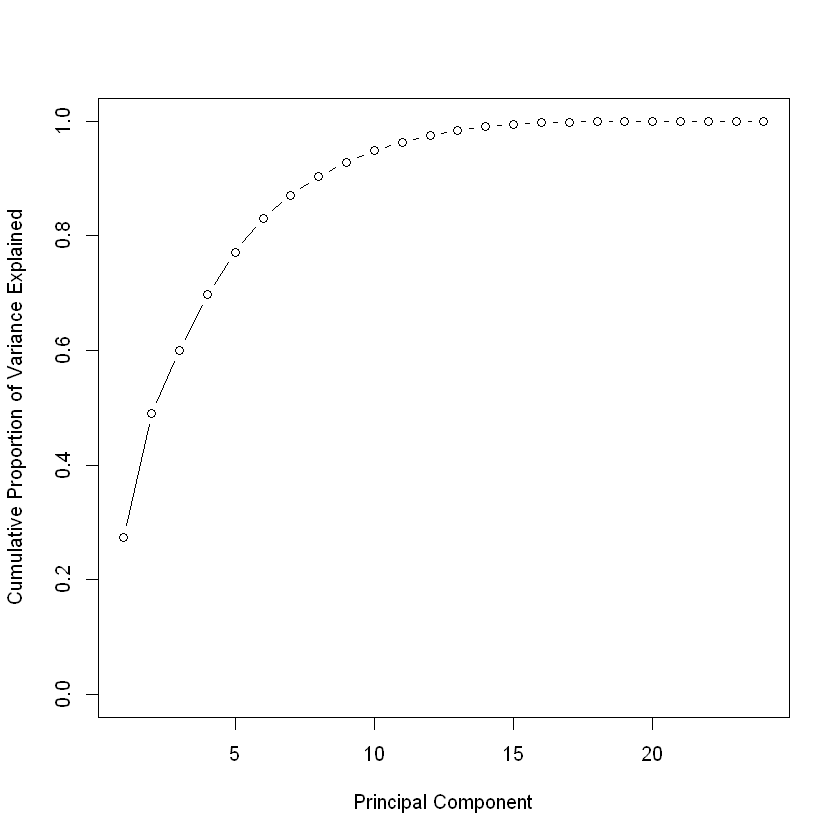

In [33]:
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")

10 wyjasnia 95 % zmiennosci wariancji

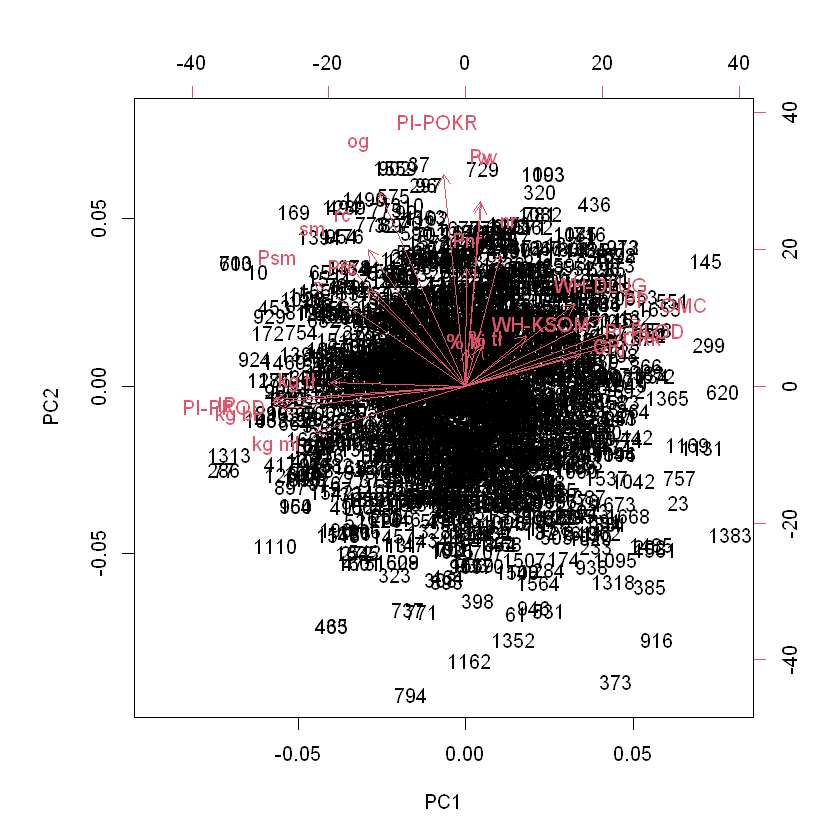

In [34]:
biplot(omc.pca)

## 4.3 Dane odstające

### 4.3.1 Podejście jedno-wymiarowe 

To wspisy, które według metryki między kwantylowej
są  poza zakresem Q3-Q1

In [35]:
box_plot_odstajce <- function (zmienna,nazwa){
  boxplot(zmienna, main = nazwa
  )
  out <- boxplot.stats(zmienna)$out
  mtext(paste("Outliers: ", paste(out, collapse = ", ")))
  out_ind <- which(zmienna %in% c(out))
  return (out_ind)
}
cale_bez_odst_j <- cale_train

In [36]:
colnames(cale_bez_odst_j)

[1] "Województwo"    "Data urodzenia" "PI-PROD"        "PI-POKR"       
 [5] "Prc"            "Psm"            "Pnr"            "Pw"            
 [9] "PI-PLOD"        "CRj"            "CRk"            "PP"            
[13] "OMC"            "WH-KSOM"        "WH-DLUG"        "IP"            
[17] "kg ml"          "kg tł"          "% tł"           "kg bi"         
[21] "% bi"           "rc"             "sm"             "nr"            
[25] "w"              "og"

#### Zbieram wpisy odstające każdej zmiennej do odpowiedniej zmiennnych

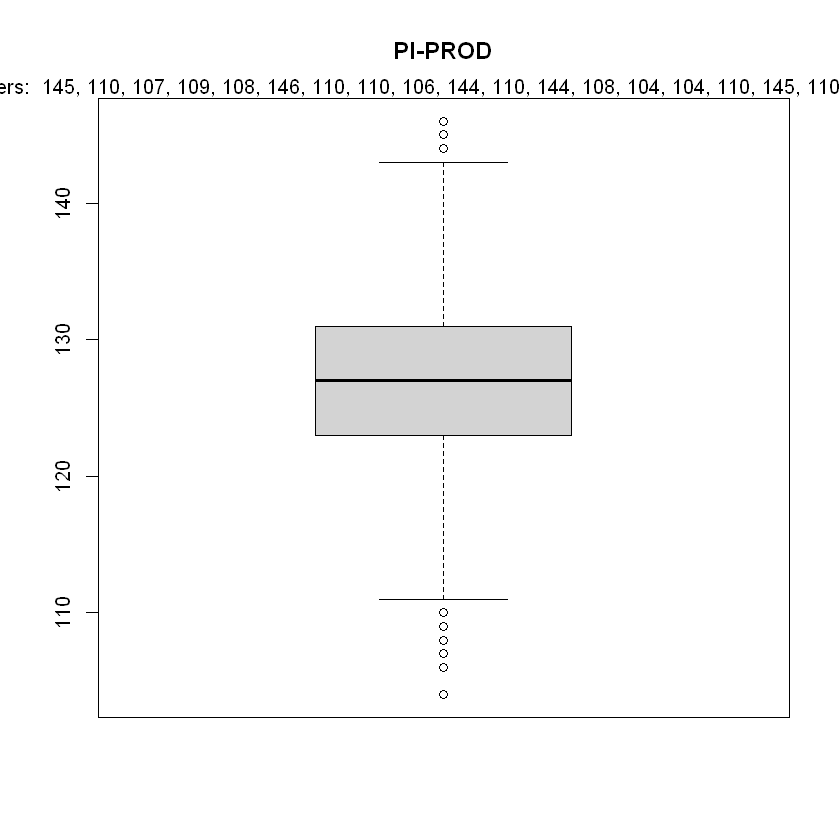

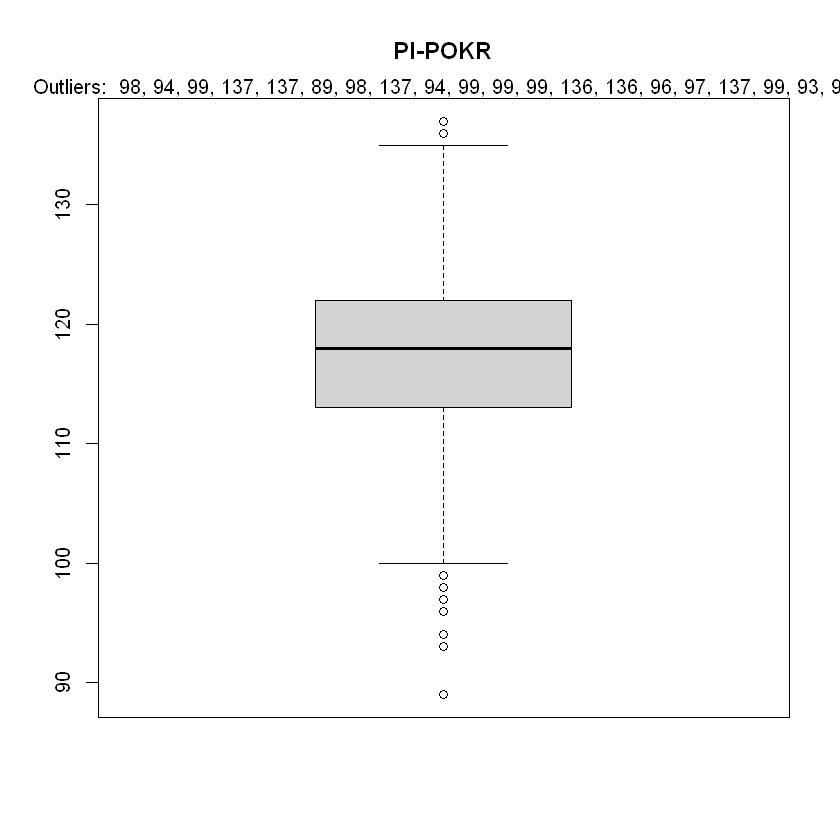

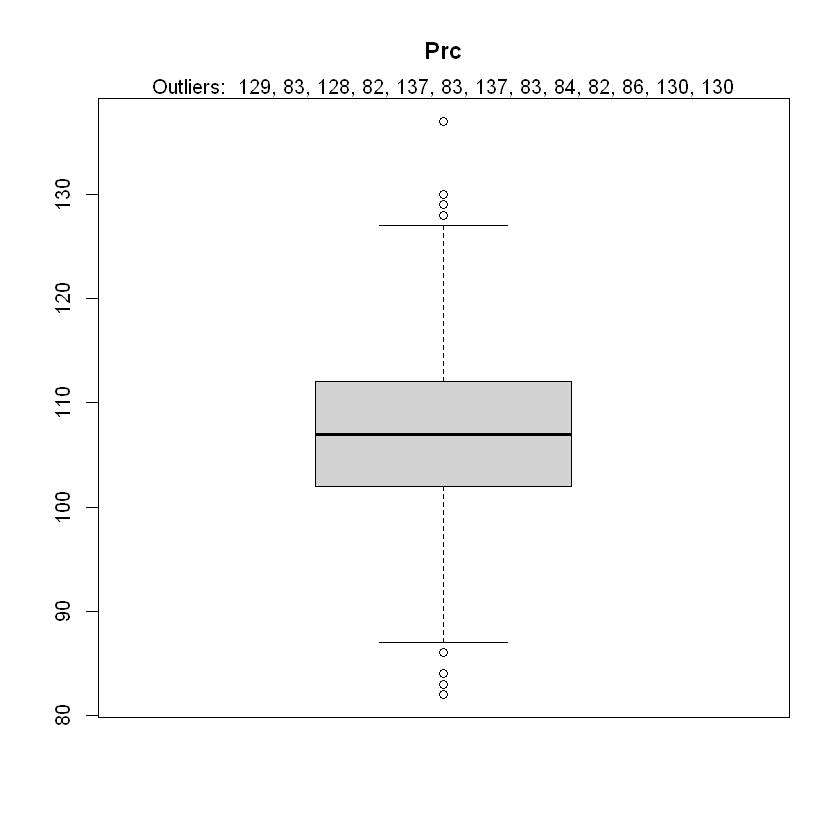

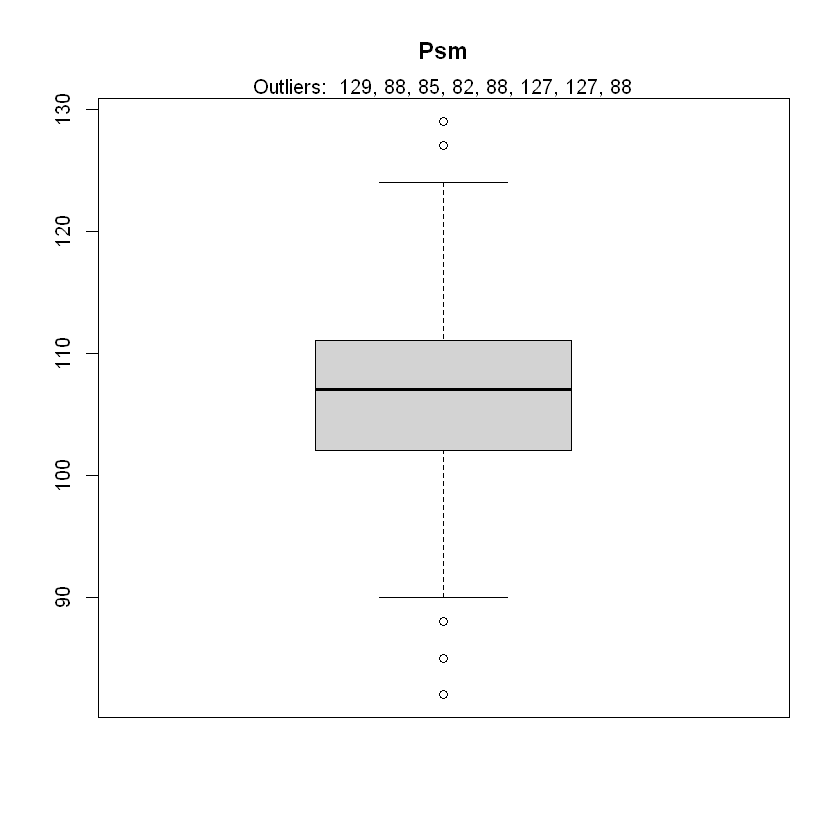

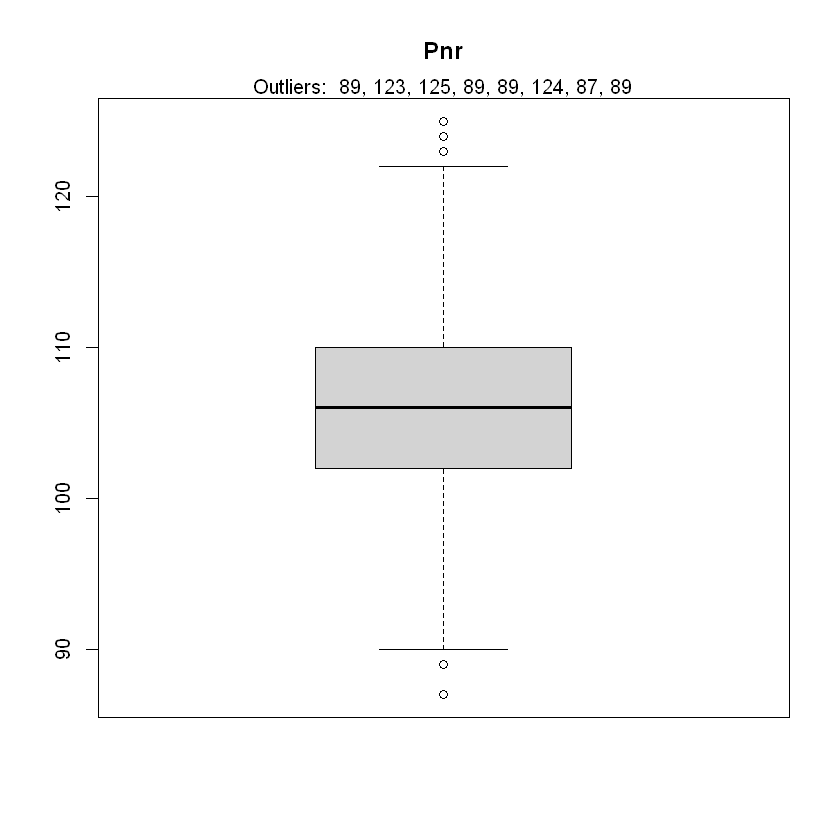

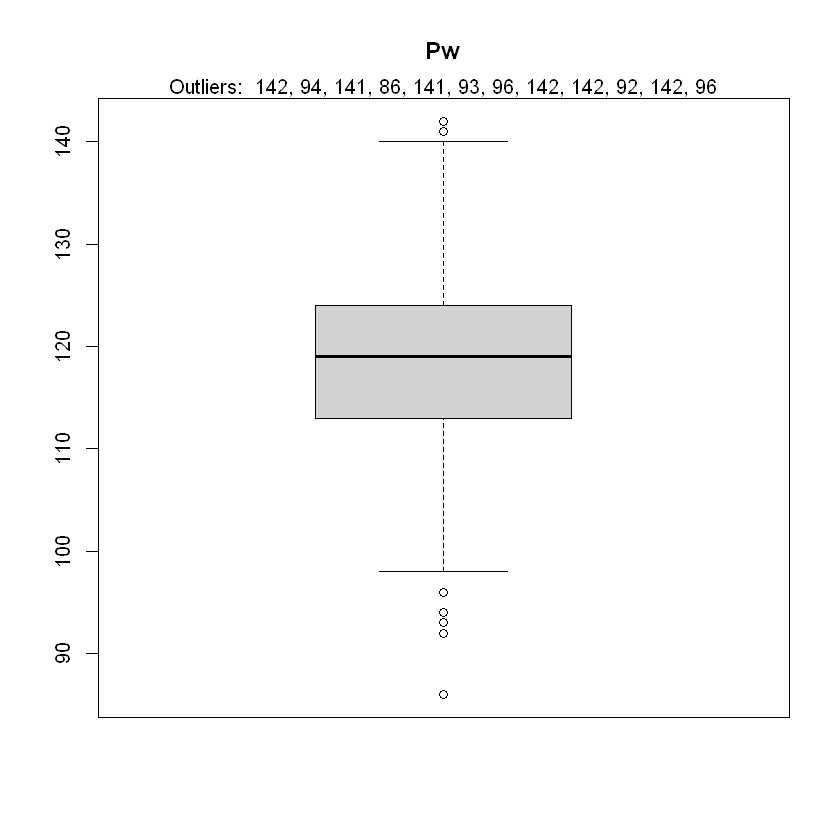

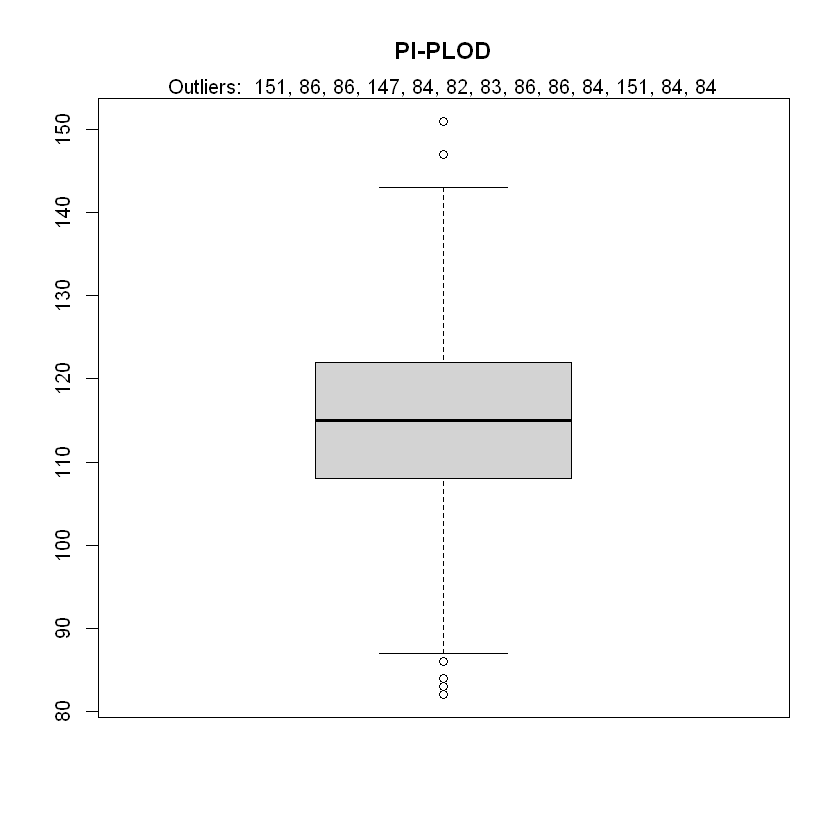

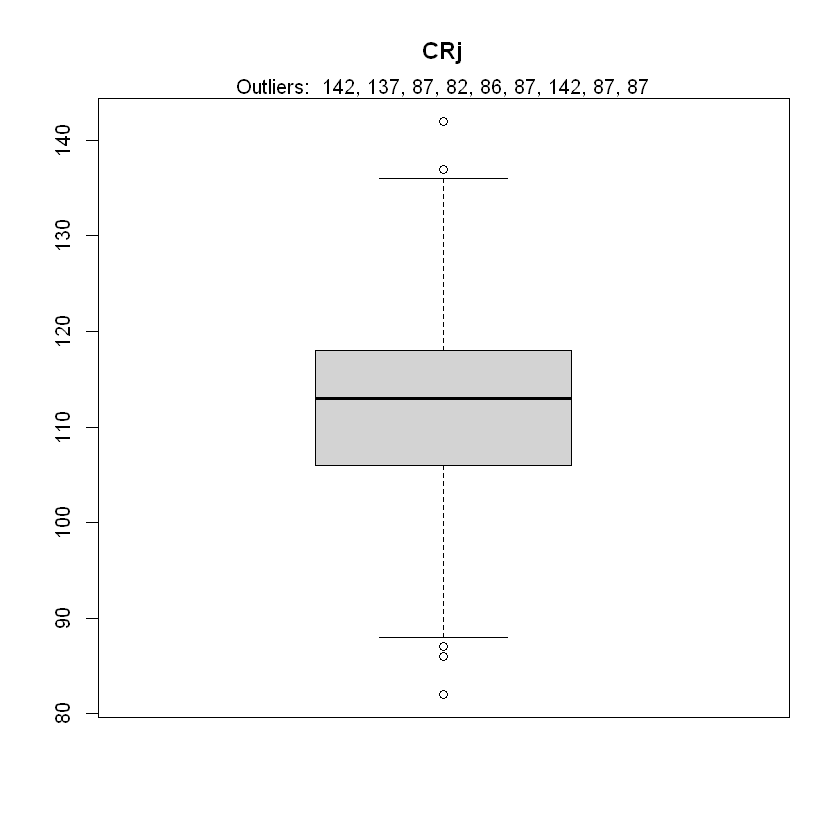

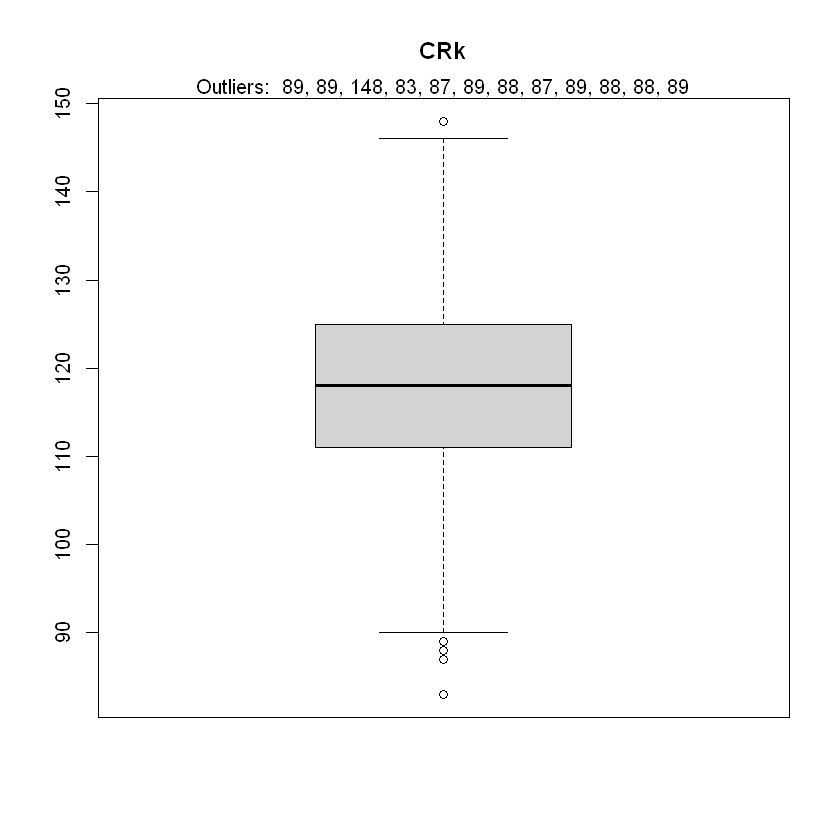

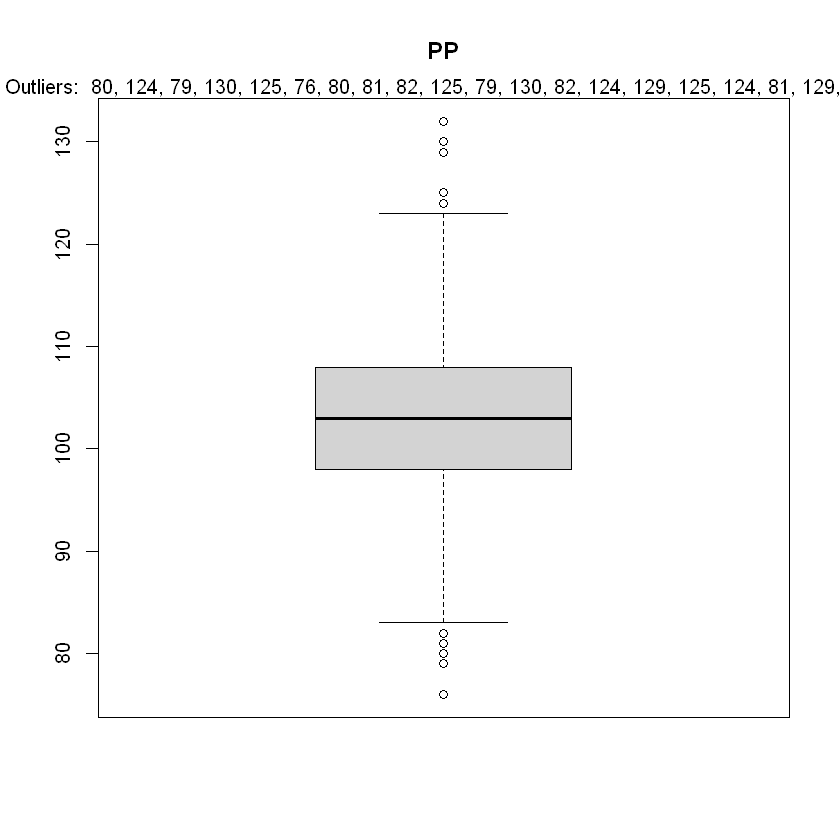

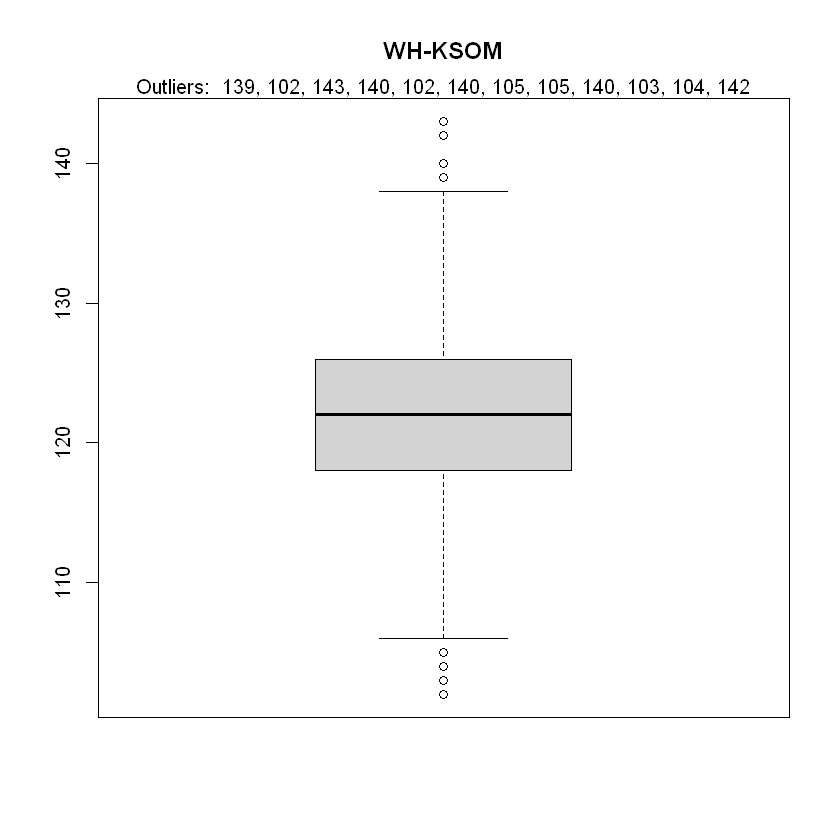

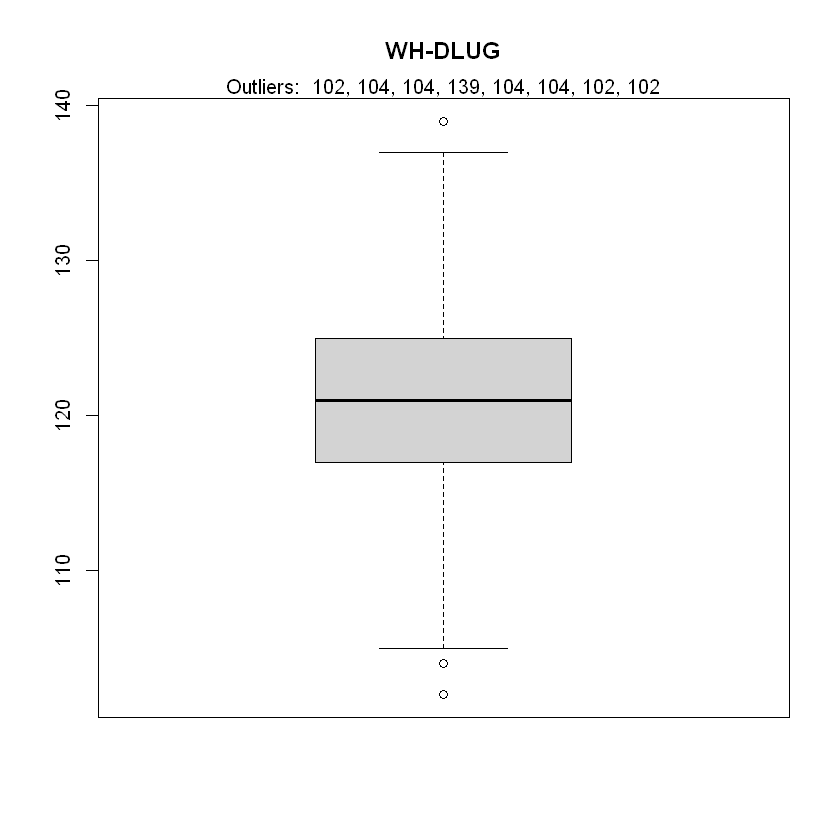

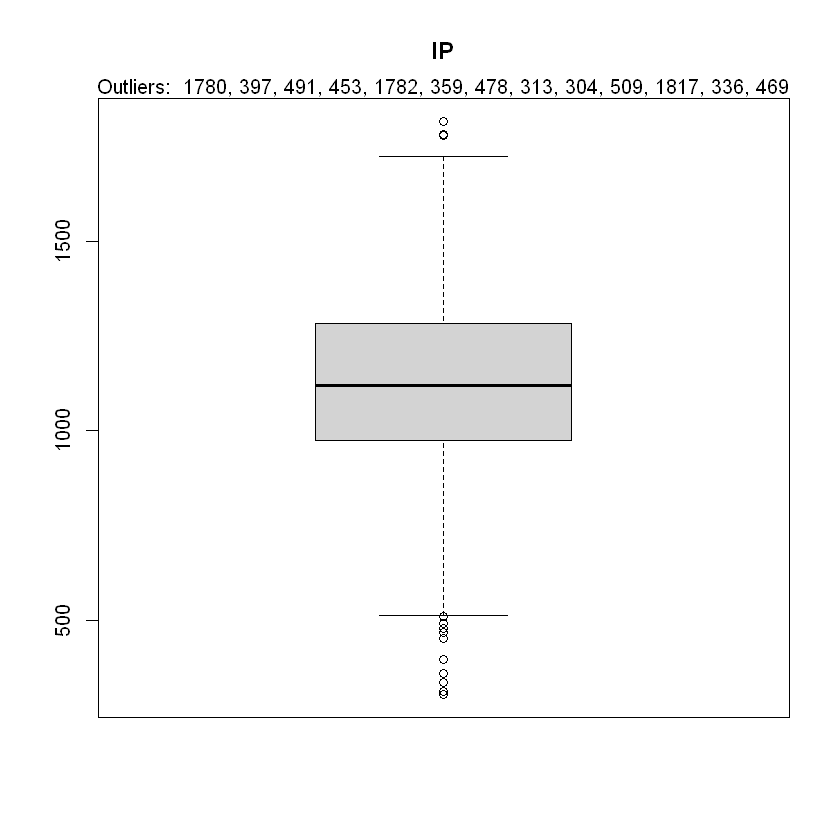

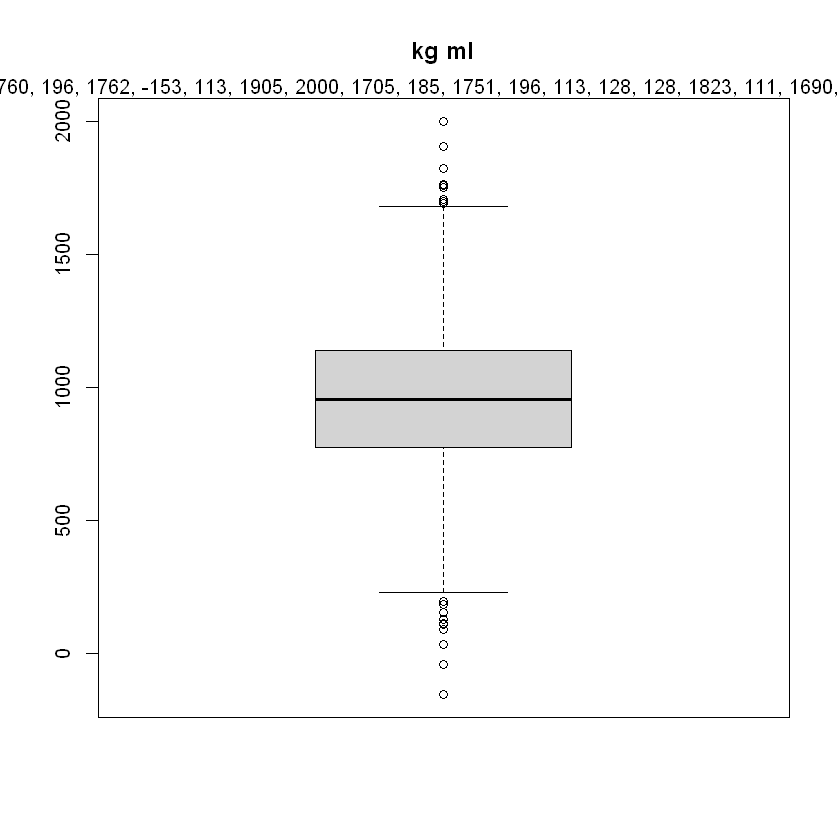

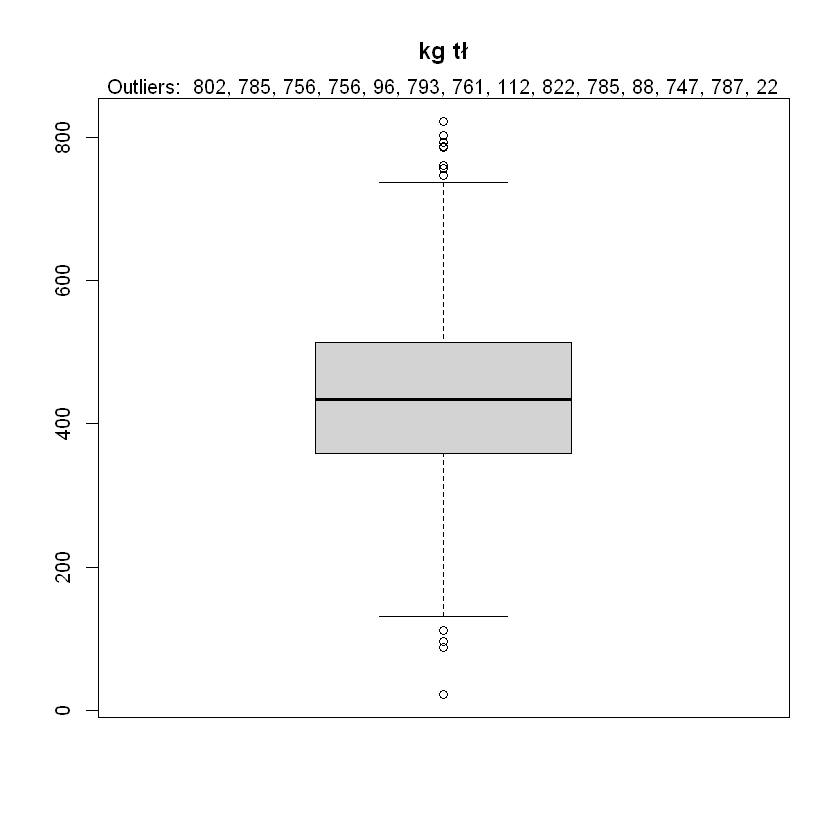

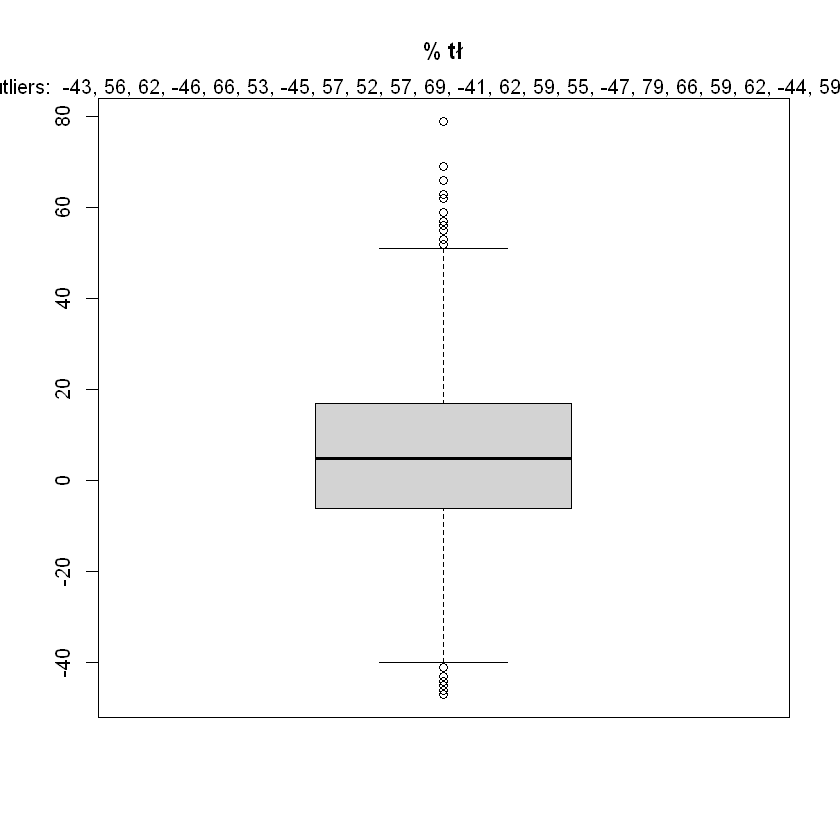

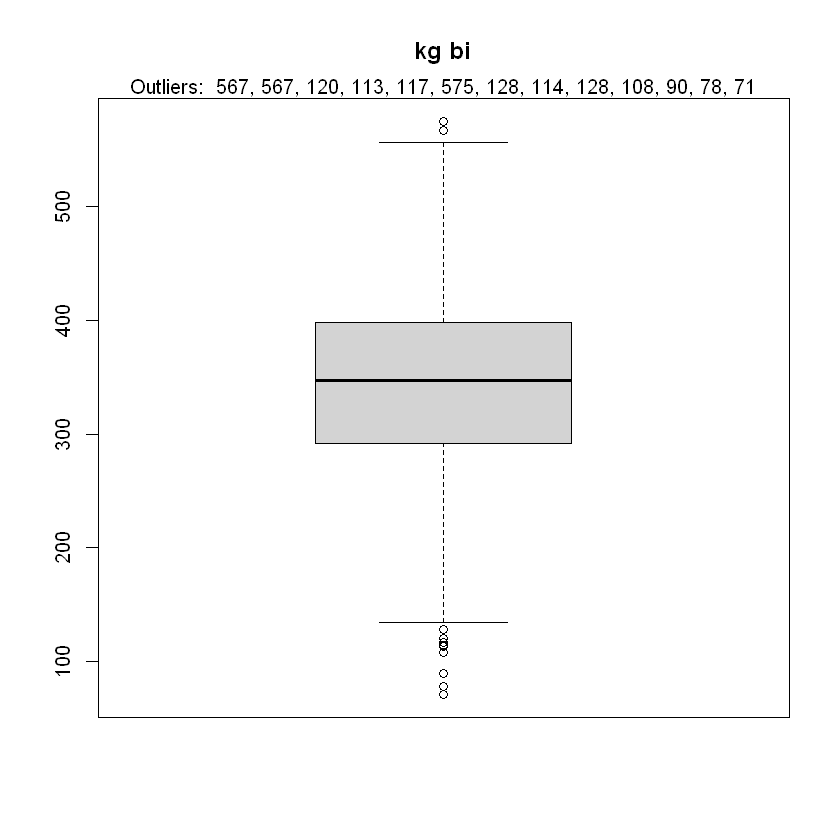

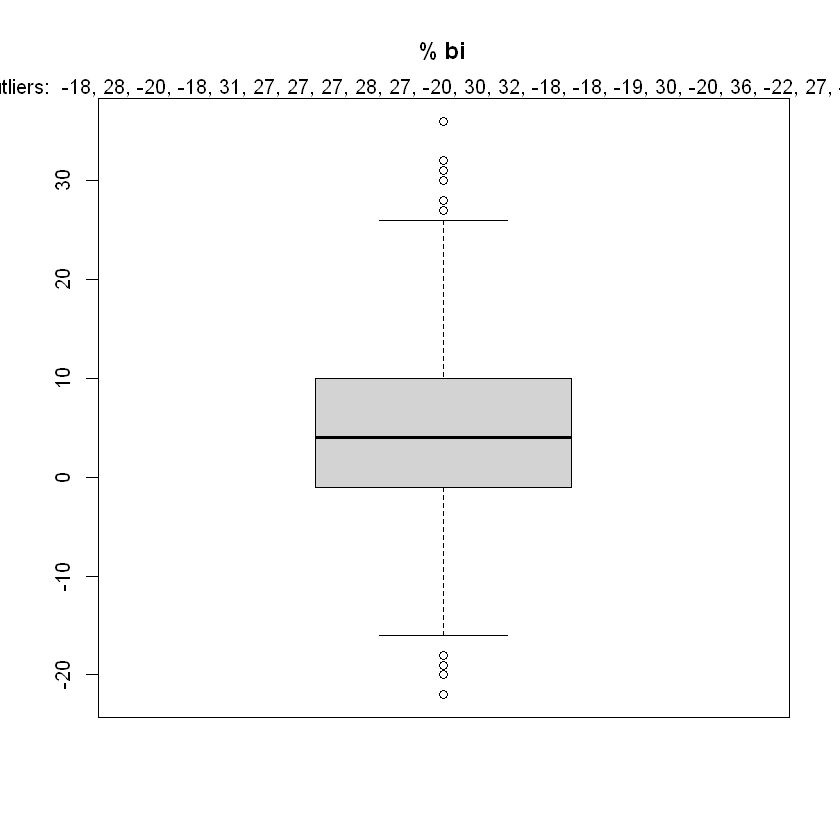

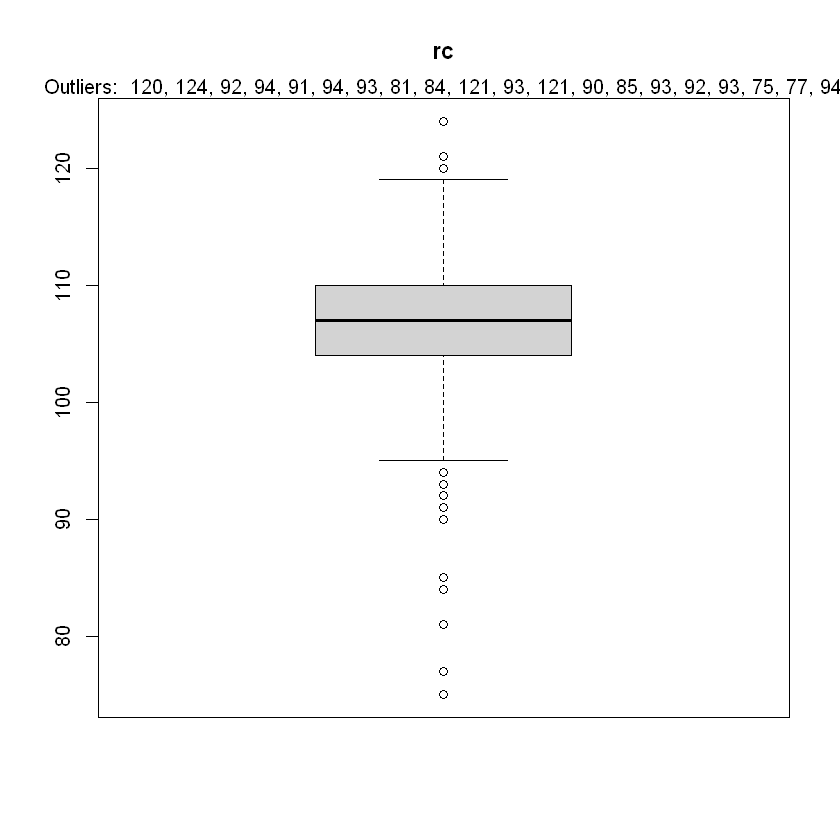

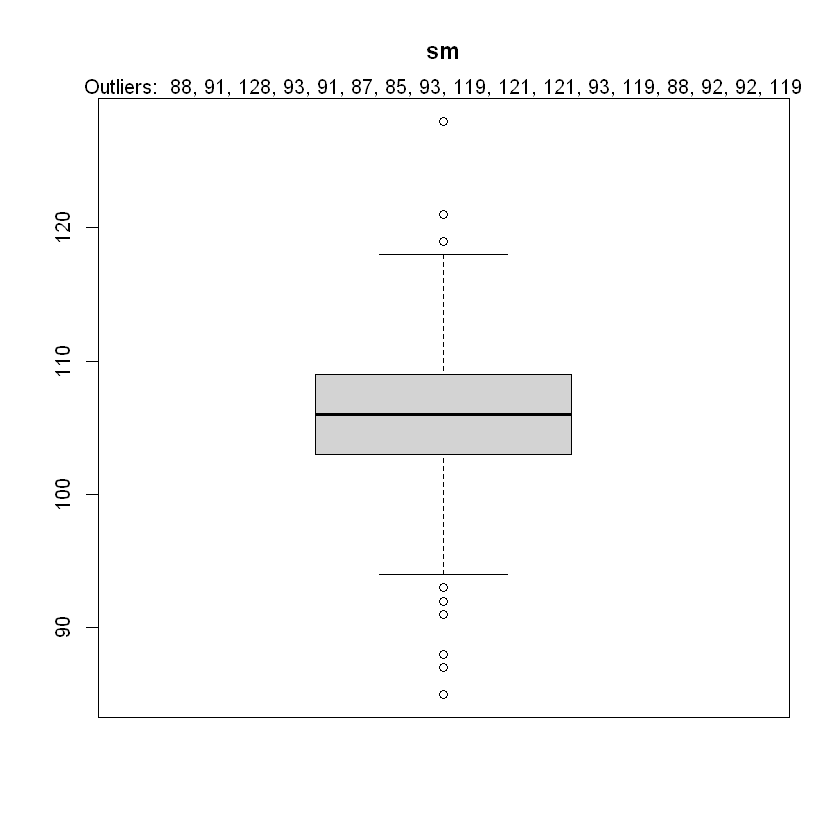

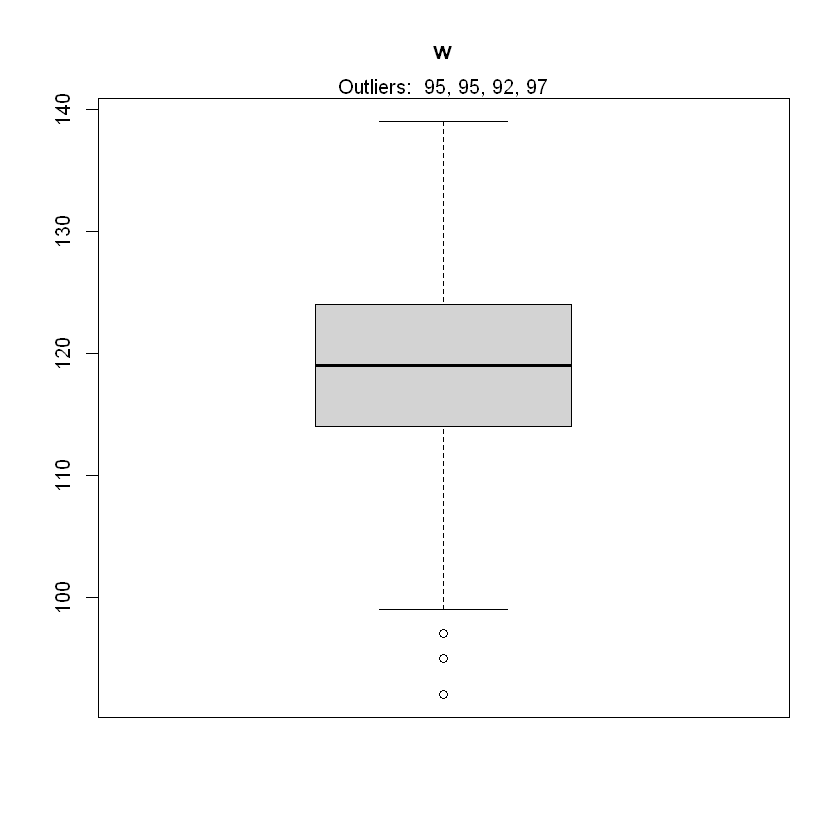

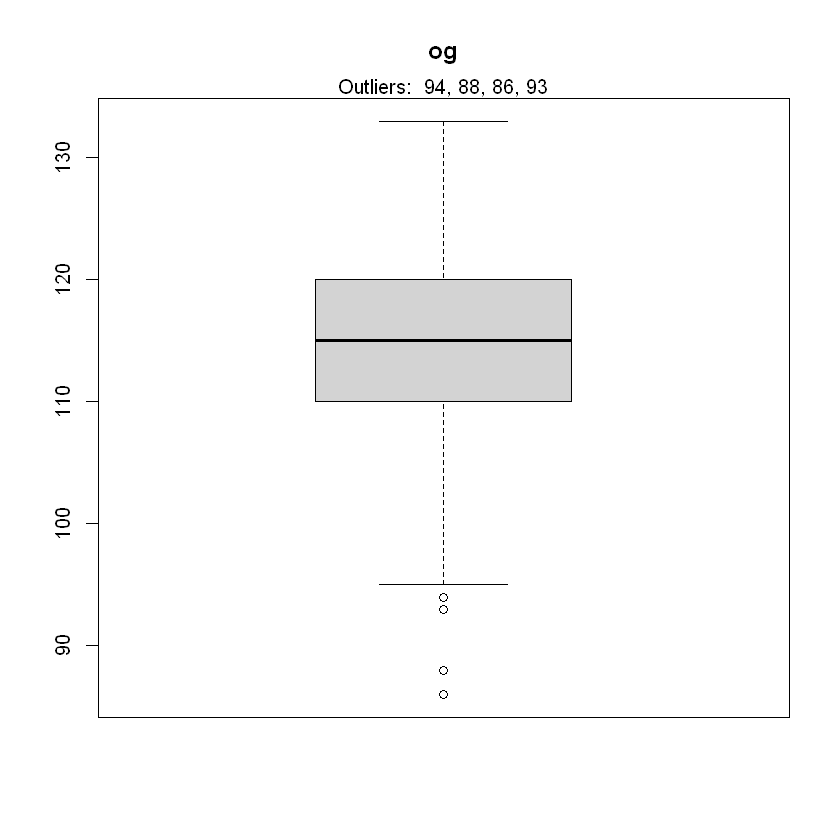

In [37]:
PI_PROD = box_plot_odstajce(cale_bez_odst_j$"PI-PROD","PI-PROD")
PI_POKR = box_plot_odstajce(cale_bez_odst_j$"PI-POKR","PI-POKR")
Prc = box_plot_odstajce(cale_bez_odst_j$Prc,"Prc")
Psm = box_plot_odstajce(cale_bez_odst_j$Psm,"Psm") 
Pnr = box_plot_odstajce(cale_bez_odst_j$Pnr,"Pnr")
Pw = box_plot_odstajce(cale_bez_odst_j$Pw,"Pw")
PI_PLOD = box_plot_odstajce(cale_bez_odst_j$"PI-PLOD","PI-PLOD")
CRj = box_plot_odstajce(cale_bez_odst_j$CRj,"CRj")
CRk = box_plot_odstajce(cale_bez_odst_j$CRk,"CRk")
PP = box_plot_odstajce(cale_bez_odst_j$PP,"PP")
WH_KSOM = box_plot_odstajce(cale_bez_odst_j$"WH-KSOM","WH-KSOM")
WH_DLUG = box_plot_odstajce(cale_bez_odst_j$"WH-DLUG","WH-DLUG")
IP = box_plot_odstajce(cale_bez_odst_j$IP,"IP")
kg_ml = box_plot_odstajce(cale_bez_odst_j$'kg ml','kg ml')
kg_tĹ = box_plot_odstajce(cale_bez_odst_j$'kg tł','kg tł')
X_tĹ = box_plot_odstajce(cale_bez_odst_j$'% tł','% tł')
kg_bi = box_plot_odstajce(cale_bez_odst_j$'kg bi','kg bi')
X_bi = box_plot_odstajce(cale_bez_odst_j$'% bi','% bi')
rc = box_plot_odstajce(cale_bez_odst_j$rc,"rc")
sm = box_plot_odstajce(cale_bez_odst_j$sm,"sm")
w = box_plot_odstajce(cale_bez_odst_j$w,"w")
og = box_plot_odstajce(cale_bez_odst_j$og,"og")

### 4.3.2 Usunięcie obserwacji odstających

Tworzę wektor wszytkich odstjąych wpisów, do ich poźniejszego usunięcia

In [38]:
wiersze=c()
wiersze = c(wiersze,PI_PROD)
wiersze = c(wiersze,PI_POKR)
wiersze = c(wiersze,Prc)
wiersze = c(wiersze,Psm)
wiersze = c(wiersze,Pnr)
wiersze = c(wiersze,Pw)
wiersze = c(wiersze,PI_PLOD)
wiersze = c(wiersze,CRj)
wiersze = c(wiersze,CRk)
wiersze = c(wiersze,PP)
wiersze = c(wiersze,WH_KSOM)
wiersze = c(wiersze,WH_DLUG)
wiersze = c(wiersze,IP)
wiersze = c(wiersze,kg_ml)
wiersze = c(wiersze,kg_tĹ)
wiersze = c(wiersze,X_tĹ)
wiersze = c(wiersze,kg_bi)
wiersze = c(wiersze,X_bi)
wiersze = c(wiersze,rc)
wiersze = c(wiersze,sm)
wiersze = c(wiersze,w)
wiersze = c(wiersze,og)

In [39]:
table(wiersze)

wiersze
   5    6   10   23   28   38   42   45   47   61   77   87   91   98   99  134 
   1    1    2    1    1    1    2    1    1    2    1    1    1    1    1    1 
 136  139  145  151  154  165  169  170  172  173  174  178  179  182  184  188 
   1    1    1    1    1    1    3    1    1    3    2    1    1    1    1    2 
 202  212  237  243  250  276  283  285  298  326  348  351  362  364  371  374 
   1    2    1    1    1    1    2    1    4    1    1    3    1    1    7    1 
 378  380  382  383  385  390  391  396  415  428  429  431  463  472  473  503 
   1    1    2    2    1    1    1    2    2    1    1    1    1    1    2    1 
 511  514  518  522  528  543  566  586  610  615  617  619  633  634  649  654 
   1    1    2    1    2    1    1    1    3    1    3    1    1    1    1    1 
 658  661  666  686  691  697  698  702  705  713  716  722  726  728  729  731 
   3    3    1    1    2    3    2    1    1    2    1    2    1    1    3    1 
 734  754  760  772 

In [40]:
wiersze_u= unique(wiersze)
length(wiersze_u)

[1] 200

Wpisów odstających jednowymiarowo jest łącznie 200, poniżej je usuwam

In [41]:
cale_bez_odst_j$ID <- rownames(cale_bez_odst_j)
cale_bez_odst_j <- cale_bez_odst_j[!cale_bez_odst_j$ID%in% as.vector(wiersze_u), ]
cale_bez_odst_j$ID <- NULL

In [42]:
dim(cale_train)

[1] 1875   26

### 4.3.3 Podejście wielowymiarowe

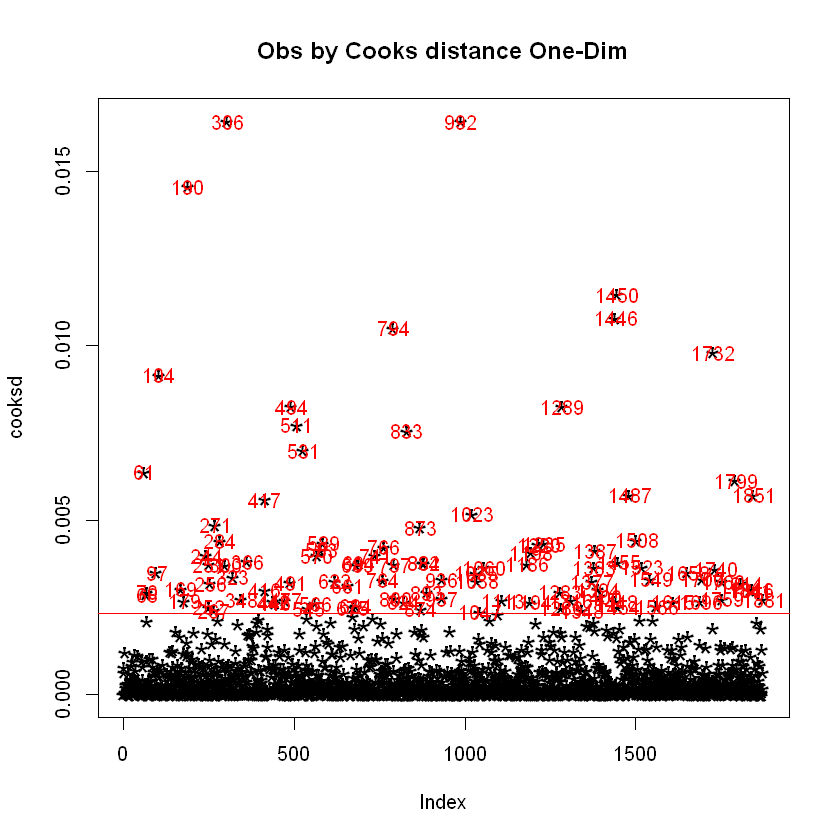

In [43]:
model_odst_w <- lm(OMC ~., data=cale_train)
cooksd <- cooks.distance(model_odst_w)

plot(cooksd, pch="*", cex=2, main="Obs by Cooks distance One-Dim")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, 
     labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels

wpisy=as.vector(ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""))
wpisy= wpisy[!wpisy==""]
wpisy=as.numeric(wpisy)

In [44]:
wpisy

[1]   61   68   70   97  104  169  179  190  244  251  252  256  267  271  284
 [16]  300  306  323  348  366  416  417  442  446  477  491  494  511  531  545
 [31]  566  570  583  589  622  661  675  684  689  694  741  764  766  794  797
 [46]  800  824  833  873  874  882  884  893  936  937  992 1023 1035 1038 1047
 [61] 1060 1113 1186 1194 1198 1220 1235 1283 1286 1289 1316 1348 1377 1383 1387
 [76] 1394 1400 1446 1448 1450 1454 1455 1487 1508 1523 1549 1566 1615 1658 1696
 [91] 1700 1732 1740 1759 1760 1799 1814 1841 1846 1851 1881

In [45]:
length(wpisy)

[1] 101

Odstających  wielowymiarowe wpisów jest 101

In [46]:
cale_bez_odst_w <- cale_train
cale_bez_odst_w$ID <- 1:length(cale_bez_odst_w$OMC)
cale_bez_odst_w <- cale_bez_odst_w[!cale_bez_odst_w$ID%in% wpisy, ]
cale_bez_odst_w$ID <- NULL
model_odst_w <-NULL

### 4.3.4 Jednowymiarowe i wielowymiarowe

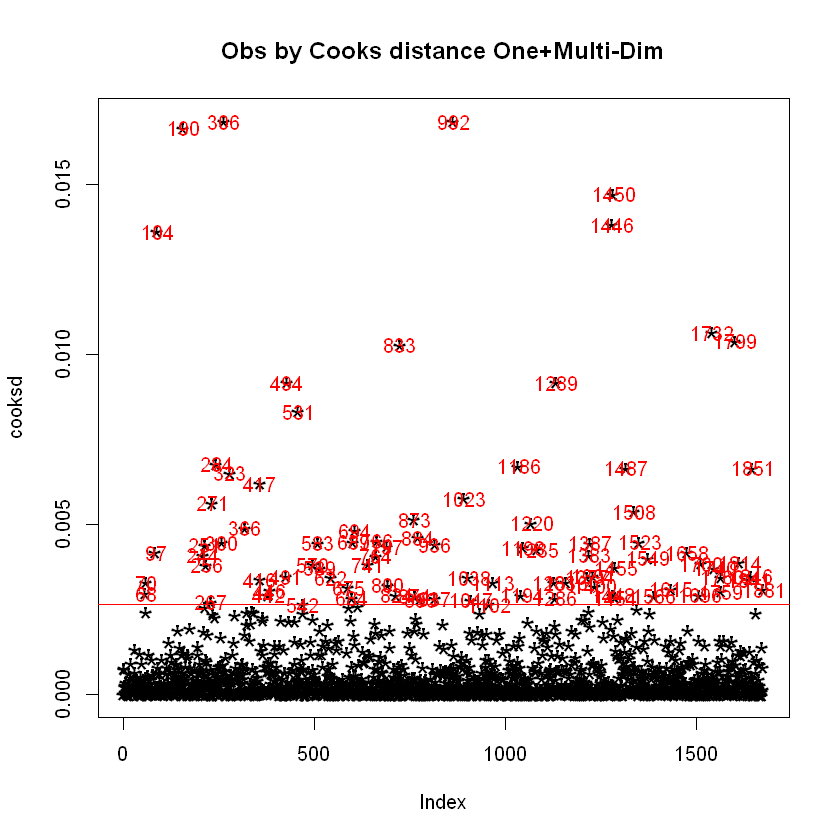

In [47]:
model_odst_j_i_w <- lm(OMC ~., data=cale_bez_odst_j)

cooksd <- cooks.distance(model_odst_j_i_w)

plot(cooksd, pch="*", cex=2, main="Obs by Cooks distance One+Multi-Dim")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, 
     labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels


wpisy=as.vector(ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""))
wpisy= wpisy[!wpisy==""]
wpisy=as.numeric(wpisy)

In [48]:
length(wpisy)

[1] 88

Odstających wielowymiarowych wpisów jest 88. O 13 mniej, po usunięciu odstających jednowymiarowo

In [49]:
cale_bez_odst_j_i_w <- cale_bez_odst_j
cale_bez_odst_j_i_w$ID <-1:length(cale_bez_odst_j$OMC)
cale_bez_odst_j_i_w <-cale_bez_odst_j_i_w[!cale_bez_odst_j_i_w$ID%in% wpisy, ]
cale_bez_odst_j_i_w$ID <- NULL
model_odst_j_i_w <- NULL

# 5. Modele

## 5.1 Modele - budowa

In [50]:
train.control <- trainControl(method = "cv", number = 5,savePredictions = 'all')

### 5.1.1 Pełny

In [51]:
model_pelny <- train(OMC ~., data=cale_train, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny)


Linear Regression 

1875 samples
  25 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1501, 1500, 1500, 1499 
Resampling results:

  RMSE      Rsquared   MAE     
  1.383562  0.9650407  1.109434

Tuning parameter 'intercept' was held constant at a value of TRUE


### Bez daty urodzenia i województwa

In [52]:
cale_train_b_asd<-cale_train
cale_train_b_asd$'Województwo'<-NULL
cale_train_b_asd$'Data urodzenia'<-NULL
model_pelny_b_asd <- train(OMC ~., data=cale_train_b_asd, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny_b_asd)


Linear Regression 

1875 samples
  23 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1500, 1500, 1500, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  1.393943  0.9645925  1.115236

Tuning parameter 'intercept' was held constant at a value of TRUE


### Bez Województwa

In [53]:
cale_train_b_asd<-cale_train
cale_train_b_asd$'Województwo'<-NULL
model_pelny_b_asd <- train(OMC ~., data=cale_train_b_asd, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny_b_asd)


Linear Regression 

1875 samples
  24 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1500, 1500, 1500, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  1.389432  0.9647344  1.109743

Tuning parameter 'intercept' was held constant at a value of TRUE


### Bez daty urodzenia

In [54]:
cale_train_b_asd<-cale_train
cale_train_b_asd$'Data urodzenia'<-NULL
model_pelny_b_asd <- train(OMC ~., data=cale_train_b_asd, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny_b_asd)


Linear Regression 

1875 samples
  24 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1499, 1500, 1500, 1500, 1501 
Resampling results:

  RMSE      Rsquared   MAE     
  1.392805  0.9645451  1.116473

Tuning parameter 'intercept' was held constant at a value of TRUE


### korelacje powyzej 0

In [55]:

model_pelny_b_kor_pon_0 <- train(OMC ~., data=cale_kor_pow_0, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_pelny_b_asd)


Linear Regression 

1875 samples
  24 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1499, 1500, 1500, 1500, 1501 
Resampling results:

  RMSE      Rsquared   MAE     
  1.392805  0.9645451  1.116473

Tuning parameter 'intercept' was held constant at a value of TRUE



Z pelnych, najlepsza predykcje daje bez daty uro i wojewodztwa (MAE  1.120531)

### 5.1.2 Istotne

In [56]:
model_test=lm(OMC~.,data=cale_train)

In [57]:
a=step(model_test)
summary(a)

Start:  AIC=1216.77
OMC ~ Województwo + `Data urodzenia` + `PI-PROD` + `PI-POKR` + 
    Prc + Psm + Pnr + Pw + `PI-PLOD` + CRj + CRk + PP + `WH-KSOM` + 
    `WH-DLUG` + IP + `kg ml` + `kg tł` + `% tł` + `kg bi` + `% bi` + 
    rc + sm + nr + w + og

                   Df Sum of Sq    RSS    AIC
- `WH-DLUG`         1      0.28 3430.9 1214.9
- `PI-PROD`         1      0.66 3431.3 1215.1
- `% bi`            1      0.71 3431.4 1215.2
- `kg ml`           1      0.93 3431.6 1215.3
- rc                1      1.19 3431.8 1215.4
- `% tł`            1      2.82 3433.5 1216.3
- `PI-POKR`         1      3.23 3433.9 1216.5
<none>                          3430.7 1216.8
- Pw                1      3.75 3434.4 1216.8
- Pnr               1      5.26 3435.9 1217.6
- sm                1      7.09 3437.7 1218.6
- `kg bi`           1      7.12 3437.8 1218.7
- IP                1      7.14 3437.8 1218.7
- `kg tł`           1      7.30 3438.0 1218.8
- Województwo      13     53.90 3484.6 1220.0
- Prc         


Call:
lm(formula = OMC ~ Województwo + `Data urodzenia` + Prc + Psm + 
    Pnr + `PI-PLOD` + CRj + CRk + PP + `WH-KSOM` + IP + `kg ml` + 
    `kg tł` + `kg bi` + sm + nr + w + og, data = cale_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1693 -0.9631 -0.0187  0.9481  4.4623 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     76.0120962  3.3983329  22.367  < 2e-16 ***
WojewództwoKUJAWSKO-POMORSKIE    0.0546156  0.2576129   0.212 0.832125    
WojewództwoĹ\201Ă“DZKIE             0.9076798  0.3261988   2.783 0.005448 ** 
WojewództwoĹšLÄ„SKIE            -0.4437295  0.4144165  -1.071 0.284430    
WojewództwoĹšWIÄ\230TOKRZYSKIE     -0.1832095  0.4573477  -0.401 0.688768    
WojewództwoLUBUSKIE              0.2953634  0.3171796   0.931 0.351863    
WojewództwoMAĹ\201OPOLSKIE          0.3592861  0.4692619   0.766 0.443988    
WojewództwoMAZOWIECKIE          -0.0141494  0.2796861  -0.051 0.959657    
Wojewód

In [58]:
model_istotne<- train(OMC ~ Województwo + `Data urodzenia` + Prc + 
     Psm + Pnr + `PI-PLOD` + CRj + CRk + PP  + `WH-KSOM` +
     IP + `kg ml` + `kg tł` + `kg bi` +  sm +
    nr + w + og, data=cale_train, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_istotne)


Linear Regression 

1875 samples
  18 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1500, 1501, 1500, 1499 
Resampling results:

  RMSE      Rsquared   MAE    
  1.387352  0.9652147  1.11393

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.3 Z artefaktami

In [59]:
model_artefakty <- train(OMC ~., data=cale_artefakty, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_artefakty)

Linear Regression 

1875 samples
  18 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1499, 1500, 1500, 1501, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  1.447347  0.9619516  1.160855

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.4 Pełny bez obserwacji odstających jednowymiarowych

In [60]:
model_odst_j <- train(OMC ~., data=cale_bez_odst_j, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_j)

Linear Regression 

1676 samples
  25 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1341, 1342, 1341, 1341, 1339 
Resampling results:

  RMSE      Rsquared   MAE     
  1.386682  0.9636983  1.110978

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.5 Pełny bez obserwacji odstających wielowymiarowych

In [61]:
model_odst_w <- train(OMC ~., data=cale_bez_odst_w, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_w)


Linear Regression 

1775 samples
  25 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1421, 1420, 1420, 1419, 1420 
Resampling results:

  RMSE      Rsquared   MAE     
  1.387371  0.9649463  1.112552

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.6 Pełny bez obserwacji odstających jednowymiarowych i wielowymiarowych

In [62]:
model_odst_j_i_w <- train(OMC ~., data=cale_bez_odst_j_i_w, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_j_i_w)


Linear Regression 

1600 samples
  25 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1280, 1279, 1279, 1281, 1281 
Resampling results:

  RMSE      Rsquared   MAE     
  1.388086  0.9635019  1.113689

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.7 Model ze zmiennymi o korelacji powyzej >0

In [63]:
model_z_p_0 <- train(OMC ~., data=cale_kor_pow_0, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_z_p_0)



Linear Regression 

1875 samples
  15 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1500, 1501, 1499, 1500, 1500 
Resampling results:

  RMSE      Rsquared   MAE     
  1.404263  0.9640182  1.127329

Tuning parameter 'intercept' was held constant at a value of TRUE


### 5.1.8 połączenie najlepszych modeli - bez wielowym i istotnych

In [64]:
model_odst_w_istotny <- train(OMC ~ Województwo + `Data urodzenia` + Prc + 
     Psm + Pnr + `PI-PLOD` + CRj + CRk + PP  + `WH-KSOM` +
     IP + `kg ml` + `kg tł` + `kg bi` +  sm +
    nr + w + og, data=cale_bez_odst_w, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_odst_w_istotny)


Linear Regression 

1775 samples
  18 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1420, 1419, 1419, 1422, 1420 
Resampling results:

  RMSE      Rsquared   MAE     
  1.376191  0.9654116  1.107661

Tuning parameter 'intercept' was held constant at a value of TRUE


In [65]:
w_p = 1.120531
w_p_i= 1.110359
w_a=1.152562
w_o_j=1.114986
w_o_w=1.109547
w_o_j_i_w=1.113535
w_p_i_o_w=1.109222


In [66]:
wartosci=c(w_p,
           w_p_i,
w_a,
w_o_j,
w_o_w,
w_o_j_i_w,
           
           w_p_i_o_w
)

## 5.3 Wizualizacja Średniego błędu predykcji

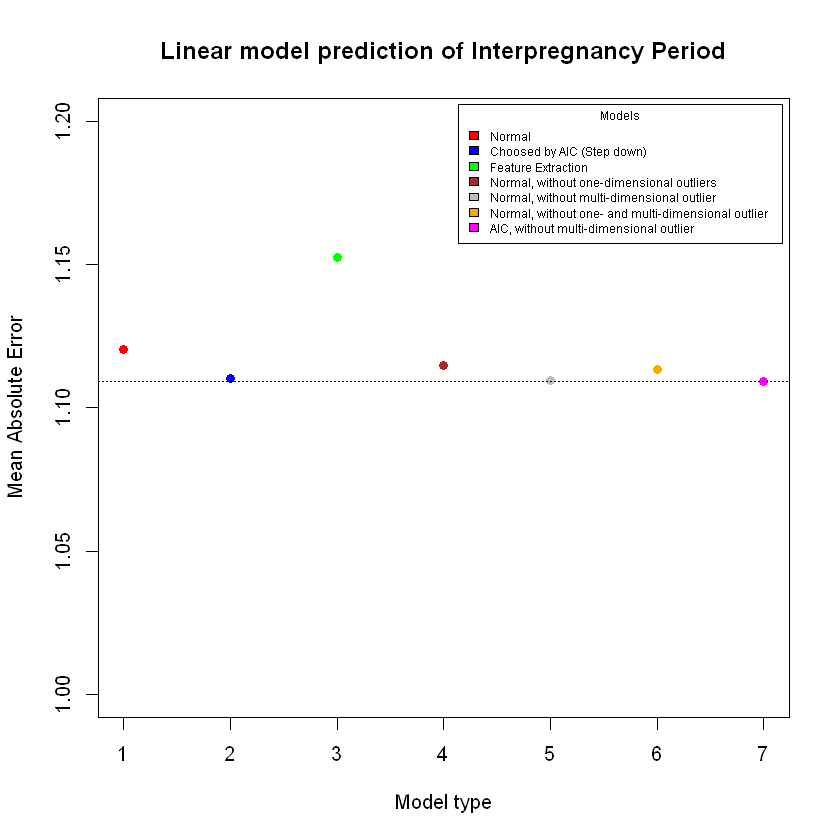

In [67]:
plot(x=0,xlim=c(1,length(wartosci)),ylim=c(round(min(wartosci)-0.1,1),round(max(wartosci),1)), 
     main = "Linear model prediction of Interpregnancy Period",ylab="Mean Absolute Error",xlab="Model type")
points(x=1, y=w_p,col="red",pch=19)
points(x=2, y=w_p_i,col="blue",pch=19)
points(x=3, y=w_a,col="green",pch=19)
points(x=4, y=w_o_j,col="brown",pch=19)
points(x=5, y=w_o_w,col="grey",pch=19)
points(x=6, y=w_o_j_i_w,col="orange",pch=19)
points(x=7, y=w_p_i_o_w,col="magenta",pch=19)

legend("topright", inset=.01, title="Models", ncol=1,
       cex = 0.6,
       c("Normal","Choosed by AIC (Step down)",
         "Feature Extraction",
         "Normal, without one-dimensional outliers",
         "Normal, without multi-dimensional outlier",
         "Normal, without one- and multi-dimensional outlier",
         "AIC, without multi-dimensional outlier"
        ),
       fill=c("red","blue","green",
              "brown","grey",
              "orange", "magenta"             ))
abline(h =min(wartosci),lty=15,col="black")

In [68]:
min(wartosci)

[1] 1.109222

Najlepszy okazał się model wytrenowany na  zbiorze z usuniętymi obserwacjami wielowymiarowych ze zmiennym iistotnymi statystycznie.

Przewiduje wartość orkesu międzyciążowego ze średnim błędem absolutnym 1.109222

In [69]:
head(model_odst_w_istotny$pred)

,pred,obs,rowIndex,intercept,Resample
,<dbl>,<int>,<int>,<lgl>,<chr>
1,104.7361,105,1,TRUE,Fold1
2,107.4427,107,9,TRUE,Fold1
3,100.3377,101,10,TRUE,Fold1
4,111.2892,111,13,TRUE,Fold1
5,107.8730,108,16,TRUE,Fold1
6,100.0112,101,19,TRUE,Fold1


In [70]:
data_frame=model_odst_w_istotny$pred
data_frame$intercept<-NULL
data_frame$rowIndex<-NULL

In [71]:
head(data_frame)

,pred,obs,Resample
,<dbl>,<int>,<chr>
1,104.7361,105,Fold1
2,107.4427,107,Fold1
3,100.3377,101,Fold1
4,111.2892,111,Fold1
5,107.8730,108,Fold1
6,100.0112,101,Fold1


In [72]:
#write.csv(data_frame,"D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/Okres Między Ciążowy/OMC_R_model_b_odst_w_istotny.csv", row.names = FALSE)

In [73]:
library(ggfortify)

Warning message:
"package 'ggfortify' was built under R version 4.0.5"


In [74]:
model_odst_w_istotny2 <- lm(OMC ~ Województwo + `Data urodzenia` + Prc + 
     Psm + Pnr + `PI-PLOD` + CRj + CRk + PP  + `WH-KSOM` +
     IP + `kg ml` + `kg tł` + `kg bi` +  sm +
    nr + w + og, data=cale_bez_odst_w)
# Summarize the results
print(model_odst_w_istotny2)



Call:
lm(formula = OMC ~ Województwo + `Data urodzenia` + Prc + Psm + 
    Pnr + `PI-PLOD` + CRj + CRk + PP + `WH-KSOM` + IP + `kg ml` + 
    `kg tł` + `kg bi` + sm + nr + w + og, data = cale_bez_odst_w)

Coefficients:
                    (Intercept)    WojewództwoKUJAWSKO-POMORSKIE  
                      75.804448                         0.002178  
           WojewództwoĹ\201Ă“DZKIE             WojewództwoĹšLÄ„SKIE  
                       0.773666                        -0.667665  
    WojewództwoĹšWIÄ\230TOKRZYSKIE              WojewództwoLUBUSKIE  
                      -0.090452                         0.318839  
        WojewództwoMAĹ\201OPOLSKIE           WojewództwoMAZOWIECKIE  
                       0.401207                        -0.056502  
            WojewództwoOPOLSKIE             WojewództwoPODLASKIE  
                       0.170100                         0.018850  
           WojewództwoPOMORSKIE  WojewództwoWARMIĹ\203SKO-MAZURSKIE  
                       0.104832

In [75]:
residua = resid(model_odst_w_istotny2)

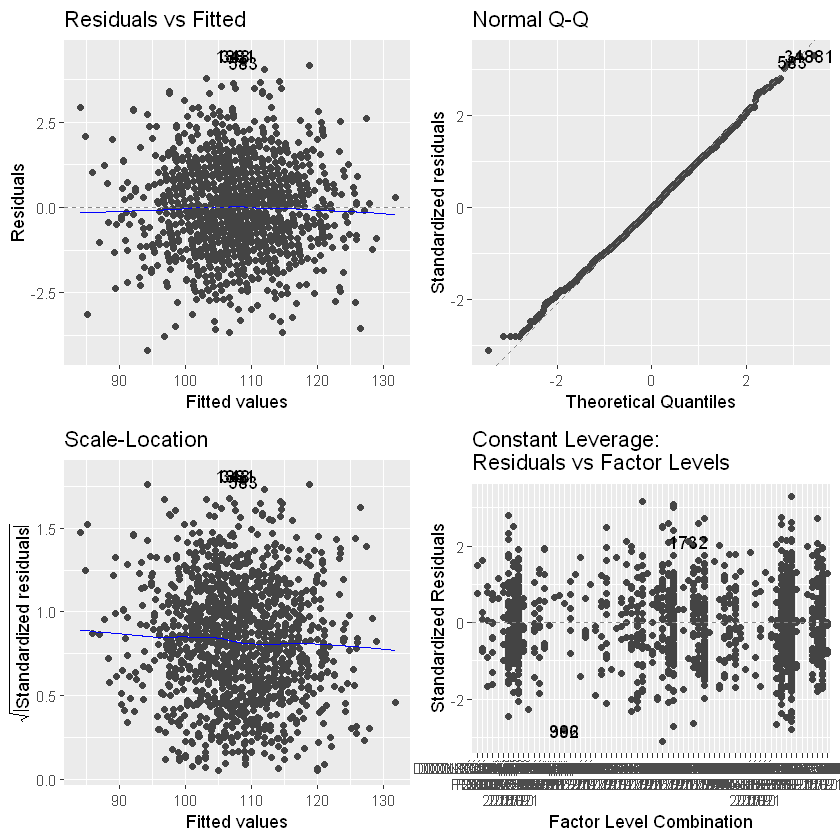

In [92]:
autoplot(model_odst_w_istotny2)

In [ ]:
aarange_(

In [77]:
# Sprawdzam rozkład reszt modelu liniowego
shapiro.test(residua)


	Shapiro-Wilk normality test

data:  residua
W = 0.99851, p-value = 0.1201


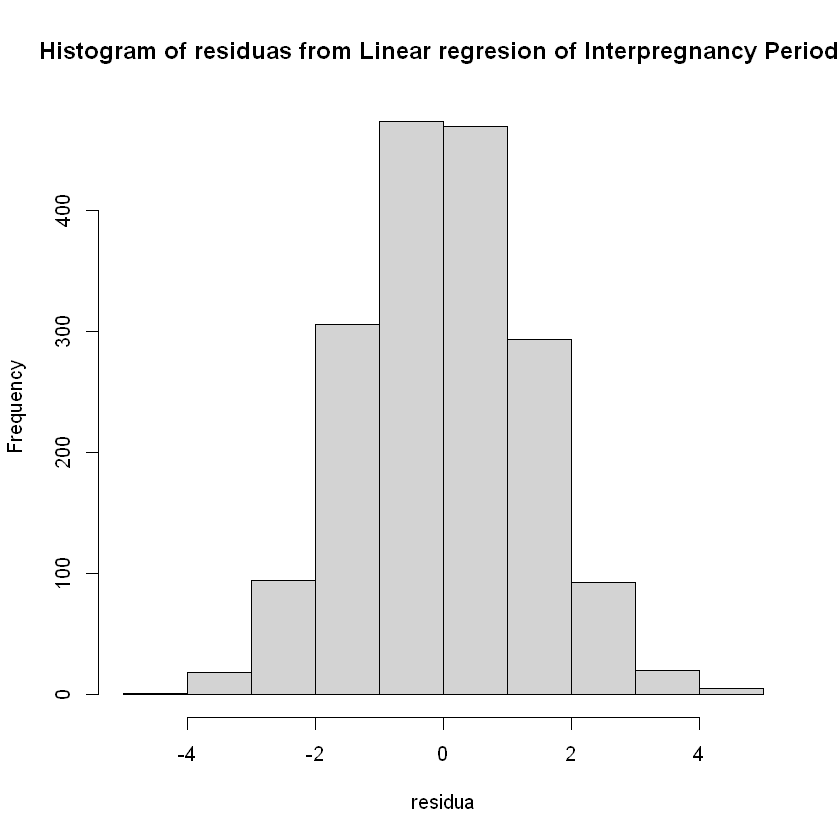

In [78]:
hist(residua,
main="Histogram of residuas from Linear regresion of Interpregnancy Period ",)

In [80]:
summary(model_odst_w_istotny2)


Call:
lm(formula = OMC ~ Województwo + `Data urodzenia` + Prc + Psm + 
    Pnr + `PI-PLOD` + CRj + CRk + PP + `WH-KSOM` + IP + `kg ml` + 
    `kg tł` + `kg bi` + sm + nr + w + og, data = cale_bez_odst_w)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1985 -0.9602 -0.0110  0.9422  4.4746 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     75.8044479  3.4551421  21.940  < 2e-16 ***
WojewództwoKUJAWSKO-POMORSKIE    0.0021778  0.2645933   0.008 0.993434    
WojewództwoĹ\201Ă“DZKIE             0.7736658  0.3348100   2.311 0.020962 *  
WojewództwoĹšLÄ„SKIE            -0.6676649  0.4450290  -1.500 0.133725    
WojewództwoĹšWIÄ\230TOKRZYSKIE     -0.0904522  0.4729612  -0.191 0.848355    
WojewództwoLUBUSKIE              0.3188394  0.3261392   0.978 0.328399    
WojewództwoMAĹ\201OPOLSKIE          0.4012067  0.4864606   0.825 0.409628    
WojewództwoMAZOWIECKIE          -0.0565024  0.2866421  -0.197 0.843758    
Wo

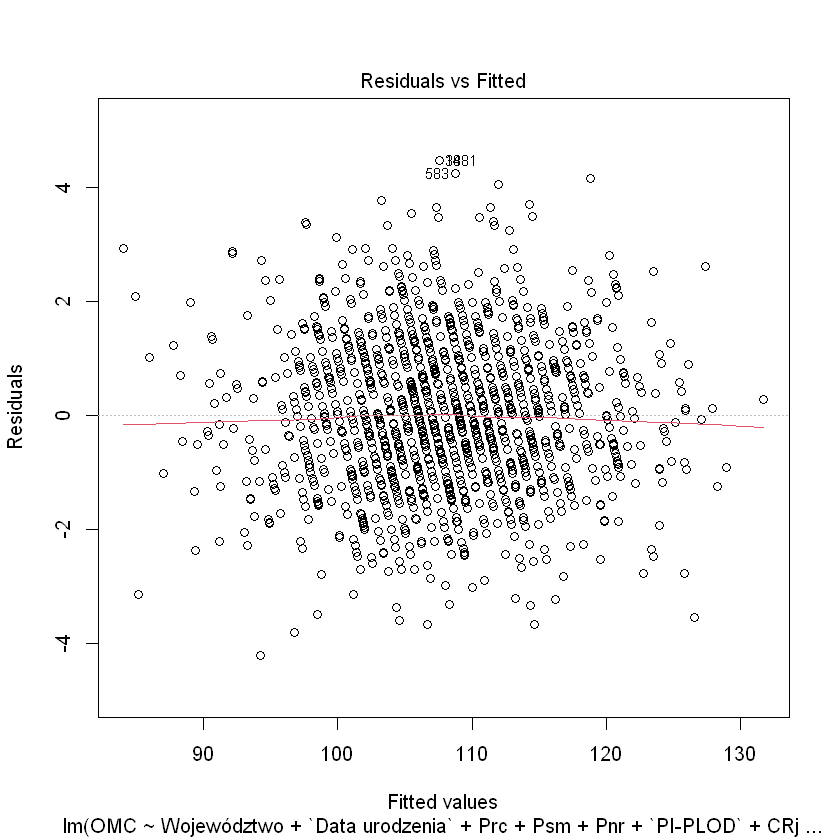

In [93]:
plot(model_odst_w_istotny2,1)

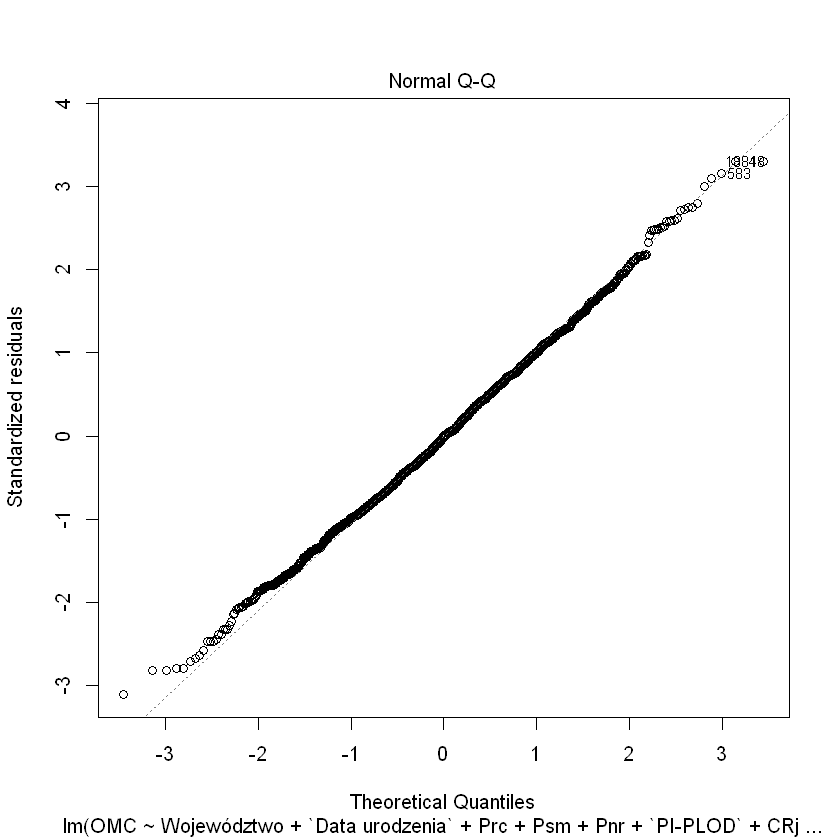

In [94]:
plot(model_odst_w_istotny2,2)

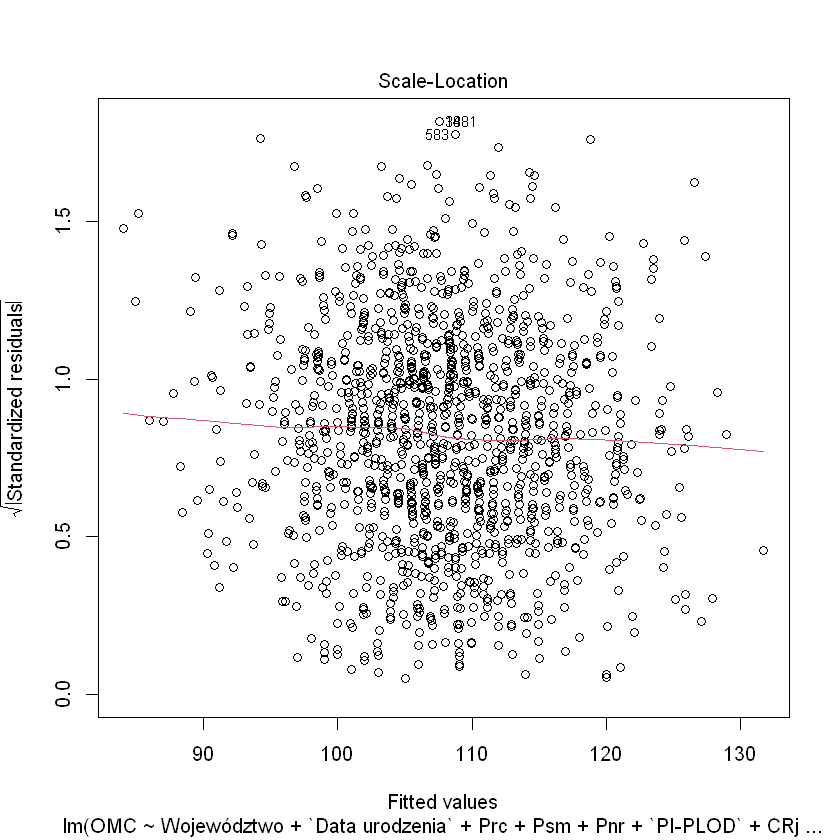

In [95]:
plot(model_odst_w_istotny2,3)

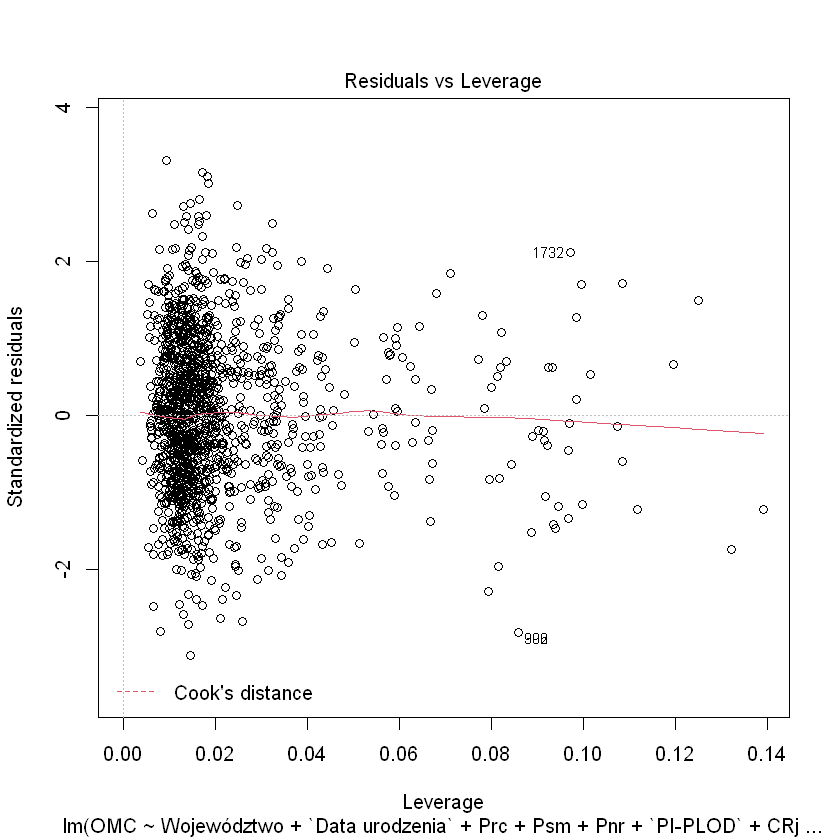

In [97]:
plot(model_odst_w_istotny2,5)